In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Importing the Dataset

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
# splitting in X (features) and y (target)
X_df = df[df.columns[1:]]

y_df = pd.DataFrame(df['Bankrupt?'])
y_df.columns = ['Bankrupt?']

In [5]:
X_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [6]:
y_df

,Bankrupt?
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


# 2. Data Preprocessing

## 2.1 Check missing Values and categorical values

In [7]:
# check if there are missing values

print('Missing values in X_df: {}'.format(X_df.isnull().values.any()))
print('Missing values in y_df: {}'.format(y_df.isnull().values.any()))



Missing values in X_df: False
Missing values in y_df: False


In [8]:
# check if there are categorical features

numCols = X_df.select_dtypes('number').columns
catCols = X_df.select_dtypes('object').columns

numCols= list(set(numCols))
catCols= list(set(catCols))

print('Number of numerical features: {}'.format(len(numCols)))
print('Number of categorical features: {}'.format(len(catCols)))


Number of numerical features: 95
Number of categorical features: 0


## 2.2 Feature Scaling

In [9]:
# features scaling preserving the flag features

from sklearn.preprocessing import StandardScaler

def get_scaling(X_df, flag_features):
    
    '''
    The function takes in input the original dataframe X_df and
    a list of index corresponding to the flag features 
    (i.e., features with values 0,1,2 etc., for example obtained 
    with One Hot Encoder if categorical in the original dataframe).

    First, the function scales all the features.

    The flag features should not be scaled: thus, the function
    drops all the flag features in a for loop from the scaled dataframe.

    Then, the flag features from the original dataframe are added to the
    scaled dataframe with their original values.
    '''
    
    sc = StandardScaler()

    X_scaled = pd.DataFrame(sc.fit_transform(X_df))

    X_scaled.columns = X_df.columns
    
    X_flag = []
    flag_names = []
    
    for flg_ftrs in flag_features:
        
        X_scaled = X_scaled.drop([X_df.columns[flg_ftrs]],axis = 1)
        
        print('Flag feature with index {}: {}'.format(flg_ftrs,X_df.columns[flg_ftrs]))
        
        X_flag.append(pd.DataFrame(X_df.values[:,flg_ftrs]))
        flag_names.append(X_df.columns[flg_ftrs])
        
    X_flag = pd.concat(X_flag, axis = 1)
    X_flag.columns = flag_names
    
    X_scaled = pd.concat([X_scaled, X_flag],axis = 1)
    
    return X_scaled

In [10]:
# flag features 84: Liability-Assets Flag
# flag features 93: Net Income Flag

X_scaled = get_scaling(X_df, flag_features = [84,93])

#X_scaled = X_df

Flag feature with index 84:  Liability-Assets Flag
Flag feature with index 93:  Net Income Flag


In [11]:
X_scaled

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Liability-Assets Flag,Net Income Flag
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,0.0,1.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,0.0,1.0
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,0.0,1.0
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826,0.0,1.0
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,-0.353693,0.0,1.0
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,-0.185856,0.0,1.0
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,1.001206,0.0,1.0
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,-0.071364,0.0,1.0


## 2.3 Visualize data distribution

<AxesSubplot:ylabel='Count'>

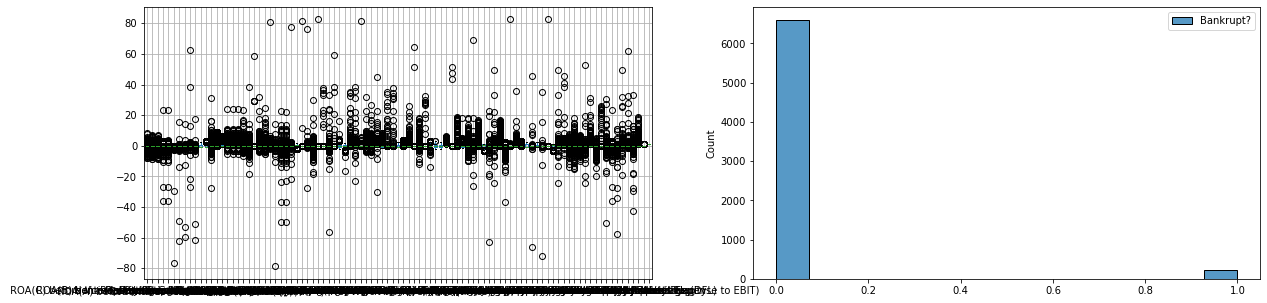

In [12]:
# features distribution after scaling

import seaborn as sns

fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(1,2,1)
X_scaled.boxplot()

ax = fig.add_subplot(1,2,2)
sns.histplot(y_df)

We can notice two aspects:

1) There are **many outliers** in the dataset

2) The dataset is **clearly imbalanced** because the majority of the instances belong to the negative class 0 (Not Bankrupted). We can visualize the imbalance also in a scatter plot.

Let's visualize the data in a scatterplot:

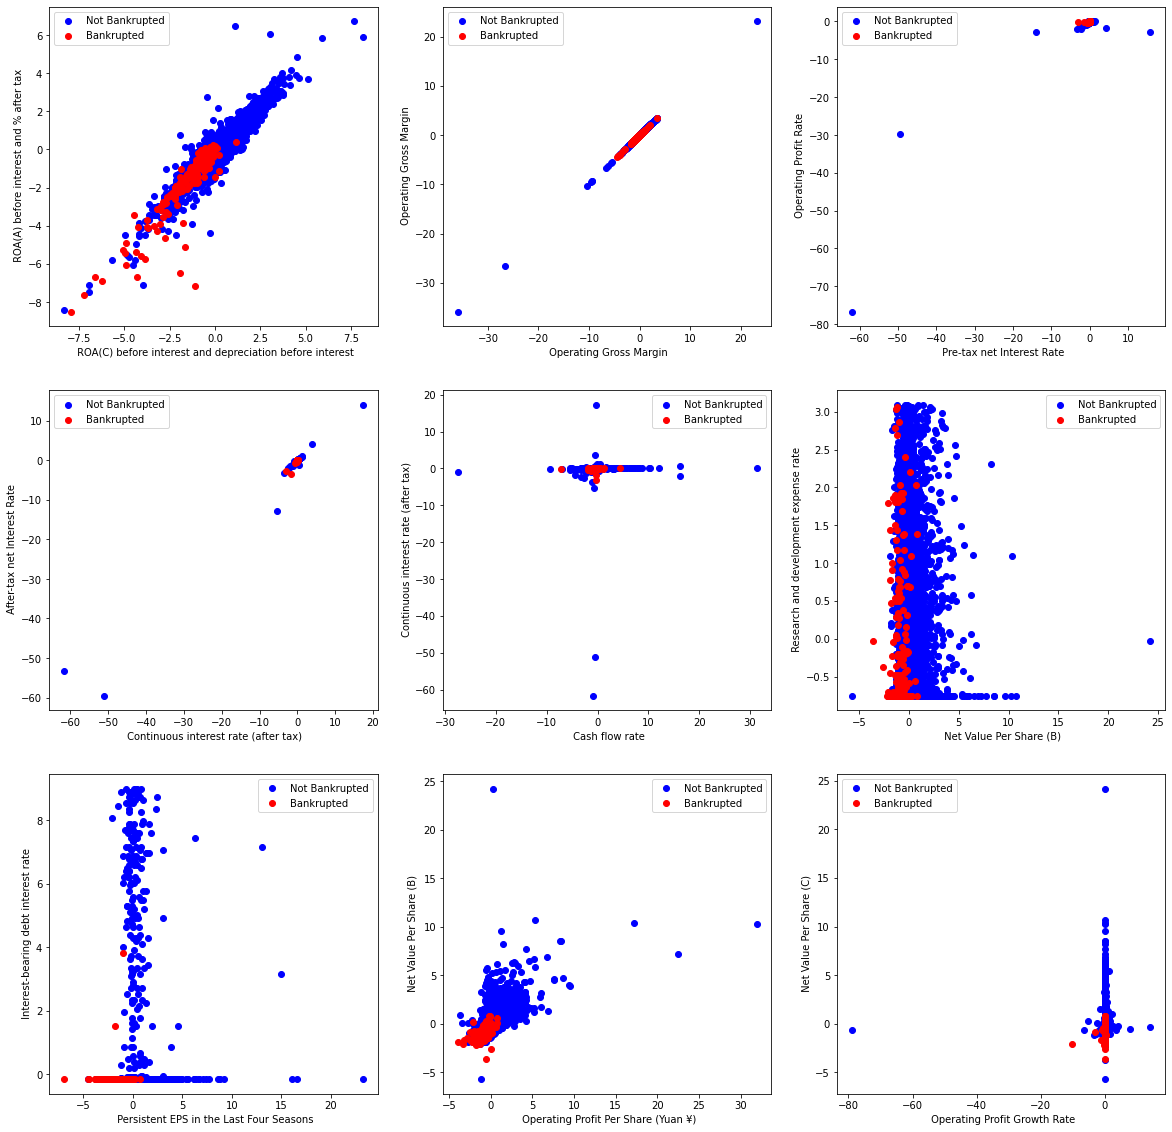

In [13]:
fig = plt.figure(figsize = (20,20))

for i in range(9):
    
    fig.add_subplot(3,3,i+1)
    
    ax_1 = 3*i
    ax_2 = 2*i+1

    plt.scatter(X_scaled.values[np.where(y_df == 0),ax_1],X_scaled.values[np.where(y_df == 0),ax_2], c = 'b')
    plt.scatter(X_scaled.values[np.where(y_df == 1),ax_1],X_scaled.values[np.where(y_df == 1),ax_2], c = 'r')
    plt.xlabel(X_scaled.columns[ax_1])
    plt.ylabel(X_scaled.columns[ax_2])
    plt.legend(['Not Bankrupted','Bankrupted'])


    



## 2.4 Dealing with Imbalanced Dataset

There are different techniques to deal with **imbalanced datasets** (https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). In particular one can:

**1) Resampling the dataset**: Adding copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement), or deleting instances from the over-represented class, called under-sampling.**

**2) Generating synthetic samples from the minority class.** The most popular of such algorithms is called **SMOTE or the Synthetic Minority Over-sampling Technique.** SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.**


In this example, we use the **SMOTE algorithm (generation of synthetic samples from the minority class**.

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_scaled, y_df)

Text(0.5, 1.0, 'SMOTE Dataset')

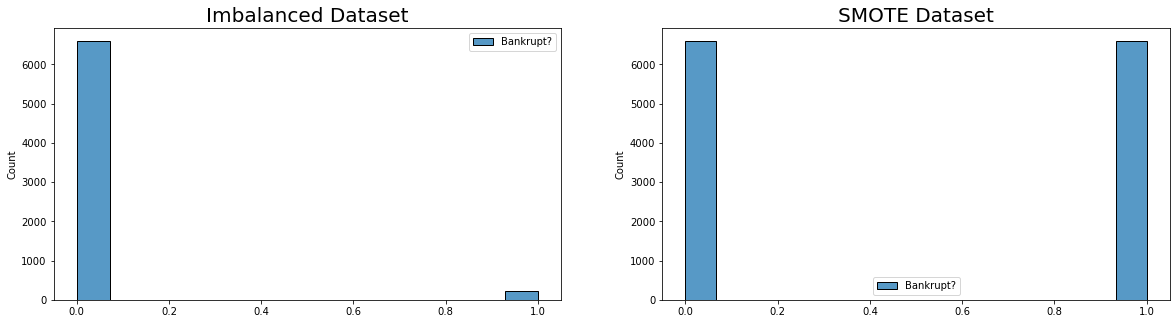

In [15]:
# data distribution before and after SMOTE

fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(1,2,1)
sns.histplot(y_df)
plt.title('Imbalanced Dataset',fontsize  = 20)

ax = fig.add_subplot(1,2,2)
sns.histplot(y_smote)
plt.title('SMOTE Dataset',fontsize  = 20)


## 2.5 Removing Outliers

In [16]:
# function to remove the outliers from the dataset (data which fall outside of the whiskers in the box plot)
# the outliers are removed for each feature separately. It can happen that data that are outliers
# for a certain feature are not outliers for another feature. 
# The threshold to consider data outliers or not is defined by q. 

# upper quartile or 75h percentile (Q3): value for which 75% of the data are less than this value (upper threshold of the box)
# lower quartile or 25th percentile (Q1): value for which 25% of the data are less than this value (lower theshold of the box)
# iqr: distance between the upper and lower quartile: Q3 - Q1

# upper whisker: Q3 + q*iqr
# lower whisler: Q1 - q*iqr

# data > upper whisker or < lower whisker : outliers

# q controls the amount of data to consider as outliers

def get_remove_outliers(X,y,q):
    
    data = np.column_stack((X.values,y.values))
    
    for j in range(data.shape[1]):
    
        median = np.median(data[:,j])
        
        upper_quartile = np.percentile(data[:,j], 75)
        lower_quartile = np.percentile(data[:,j], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = (data[:,j][data[:,j] <= upper_quartile + q * iqr]).max()
        lower_whisker = (data[:,j][data[:,j] >= lower_quartile - q * iqr]).min()
        
        data_clean = data[data[:,j] <= upper_whisker]
        data_clean = data_clean[data_clean[:,j] >= lower_whisker]
        
        data = data_clean
        
        
    X_clean = pd.DataFrame(data_clean[:,:data_clean.shape[1] - 1])
    X_clean.columns = X.columns
    
    y_clean = pd.DataFrame(data_clean[:,data_clean.shape[1] - 1])
    y_clean.columns = y.columns
    
    return X_clean,y_clean

In [17]:
q = 10

X_clean, y_clean = get_remove_outliers(X_smote,y_smote, q)

fraction_removed_outliers =  1 - X_clean.shape[0] / X_scaled.shape[0]

print('Removed {:.1f} % data'.format(fraction_removed_outliers * 100))

Removed 13.2 % data


Text(0.5, 1.0, 'y after removing outliers')

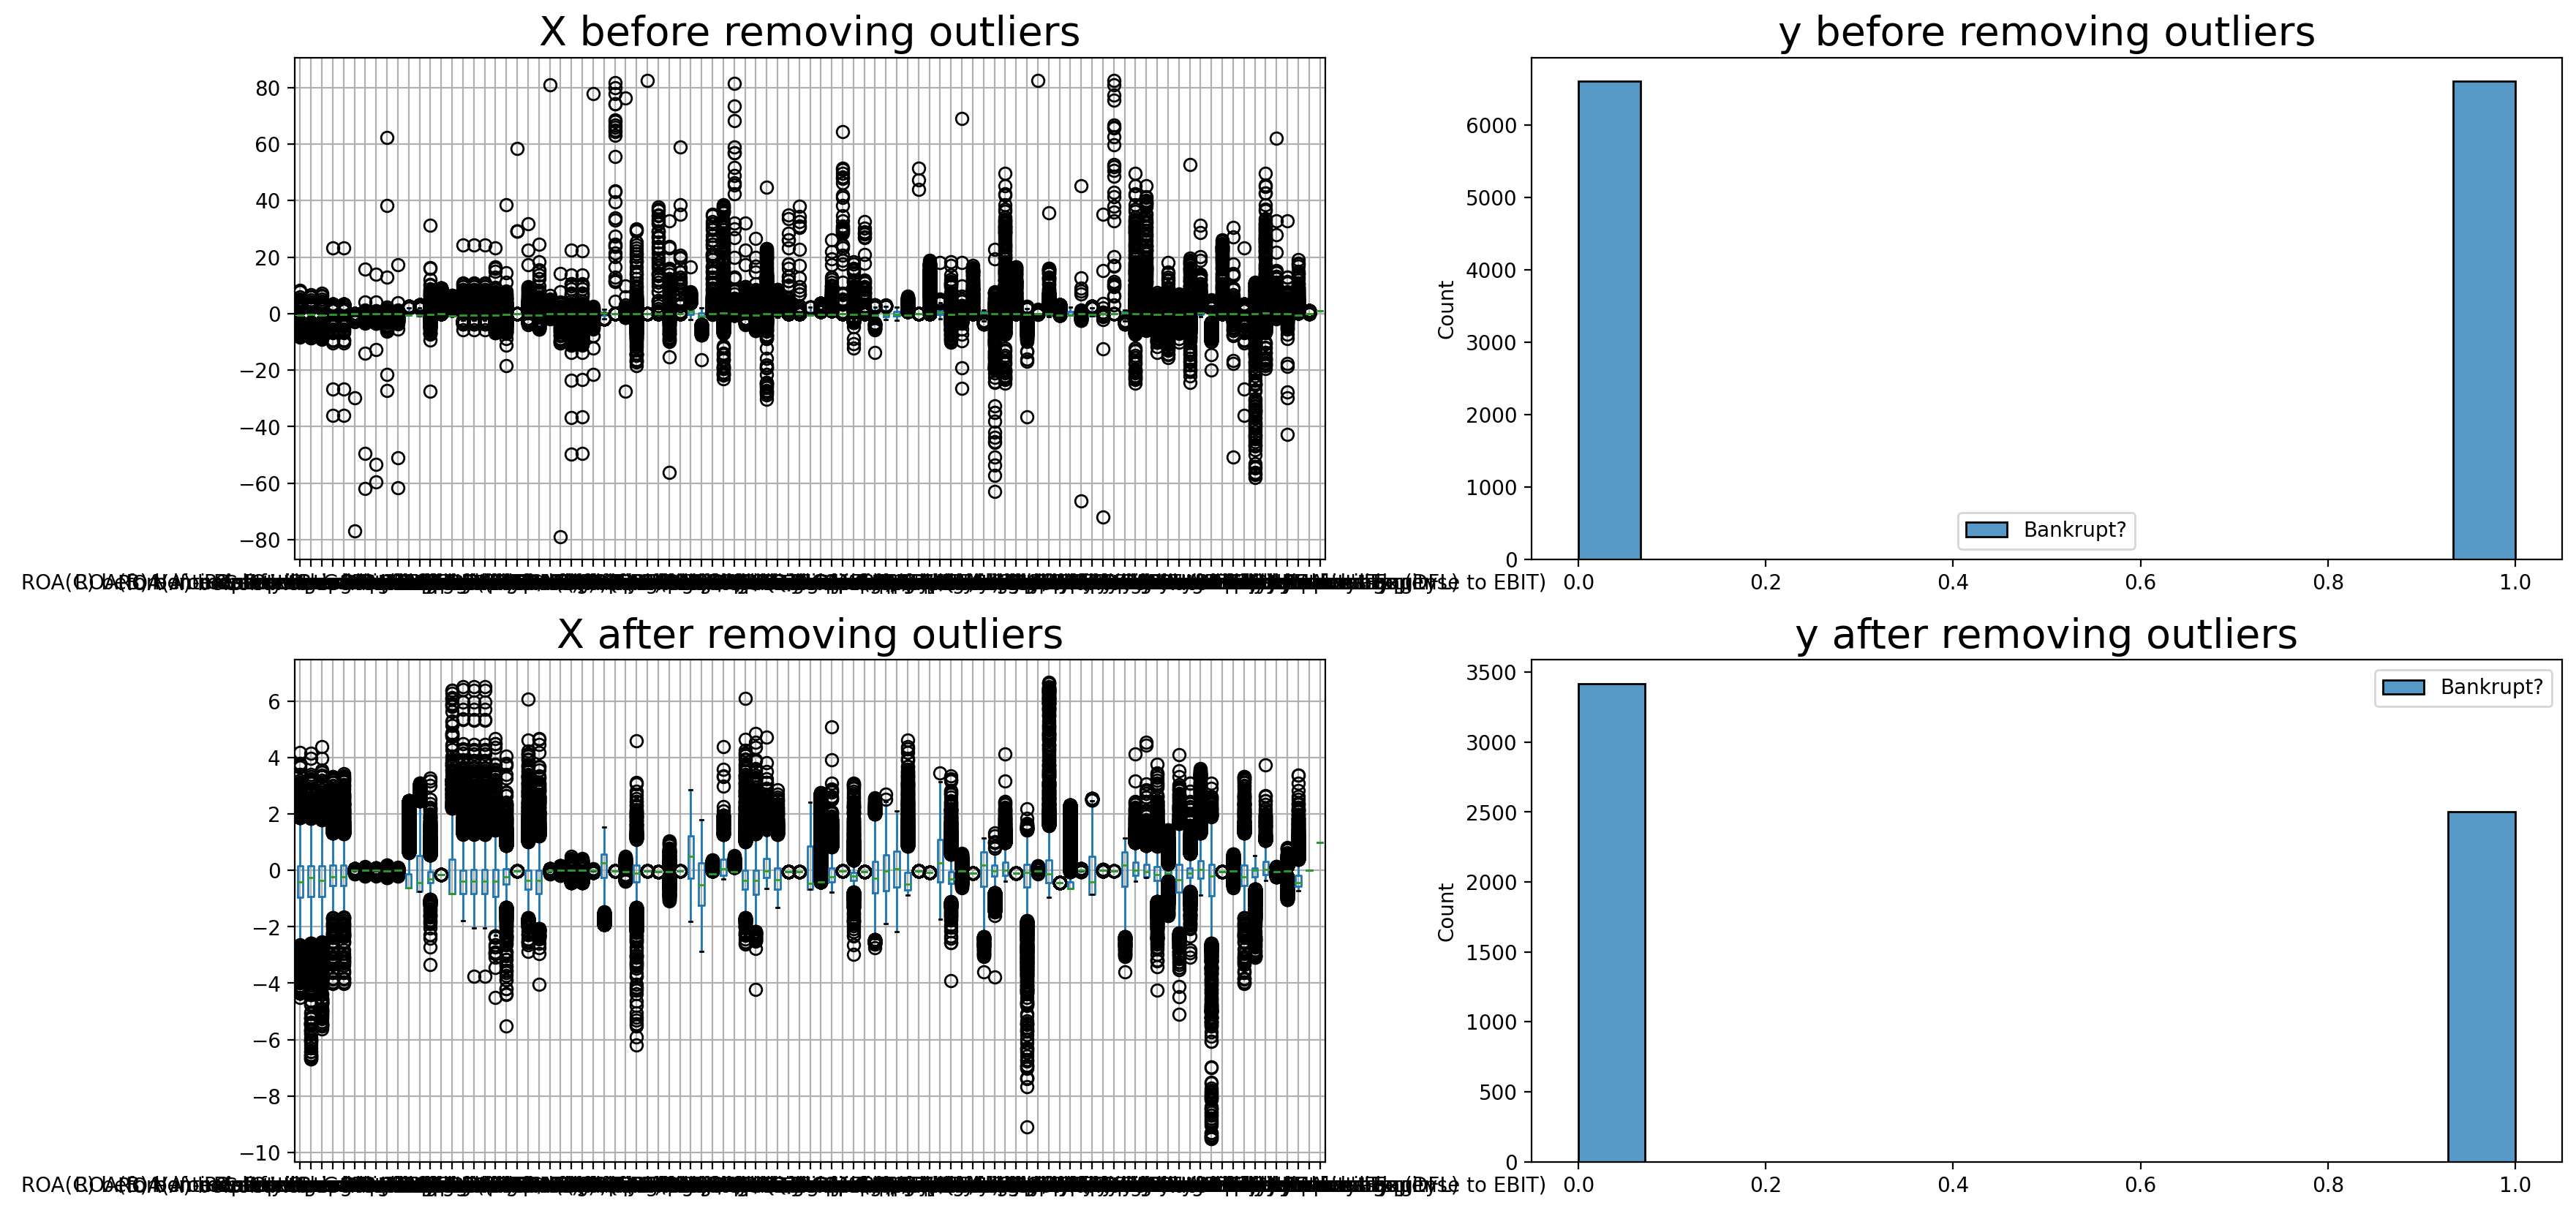

In [18]:
# data distribution after removing outliers

fig = plt.figure(figsize = (20,10), dpi = 200)

ax = fig.add_subplot(2,2,1)
X_smote.boxplot()
plt.title('X before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,2)
sns.histplot(y_smote)
plt.title('y before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,3)
X_clean.boxplot()
plt.title('X after removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,4)
sns.histplot(y_clean)
plt.title('y after removing outliers', fontsize = 20)

Removing 13.2% of the outliers we obtain features distributions which are closer to the mean. Before removing the outliers, we had huge variance, for example some features were from -80 to +80. After removing the outliers, the features range is concentrated between -9 and +6. Removing the outliers has resulted in having a low imbalance of the negative class, but compared to the original imbalance rate, this scenario is more than acceptable.

Let's visualize the boxplots and the histogram of a smaller set of features for a more clear representation.

**Boxplots**

Text(0.5, 1.0, 'X after removing outliers Boxplot')

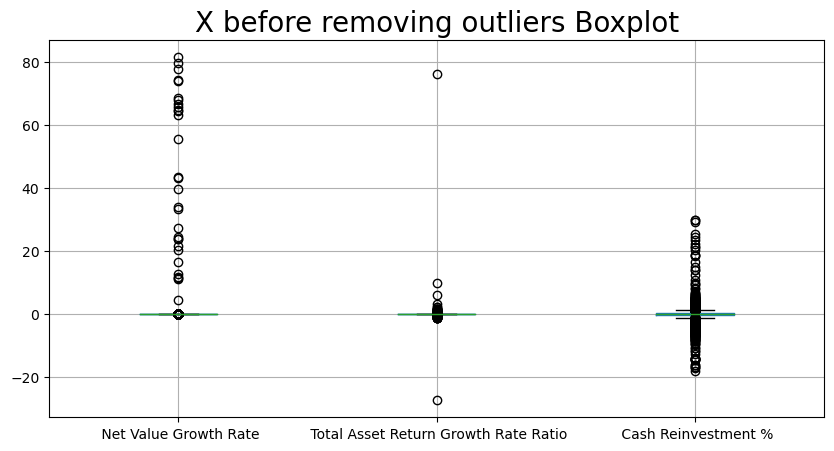

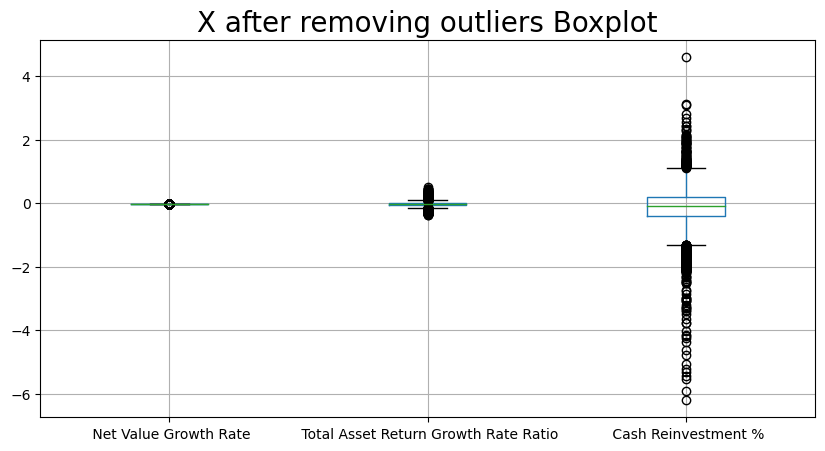

In [19]:
features = X_smote.columns[29: 32]

fig = plt.figure(figsize = (10,5), dpi = 100)

X_smote[features].boxplot()
plt.title('X before removing outliers Boxplot', fontsize = 20)

fig = plt.figure(figsize = (10,5), dpi = 100)

X_clean[features].boxplot()
plt.title('X after removing outliers Boxplot', fontsize = 20)

**Histograms**

Text(0.5, 1.0, 'X before removing outliers Boxplot')

<Figure size 2000x2000 with 0 Axes>

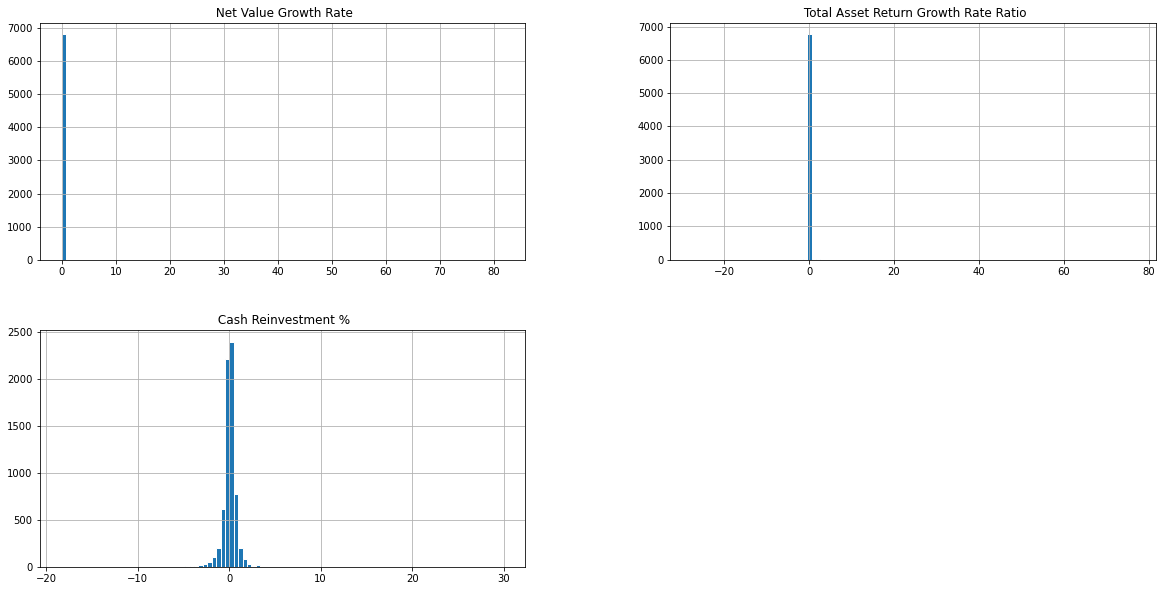

<Figure size 2000x2000 with 0 Axes>

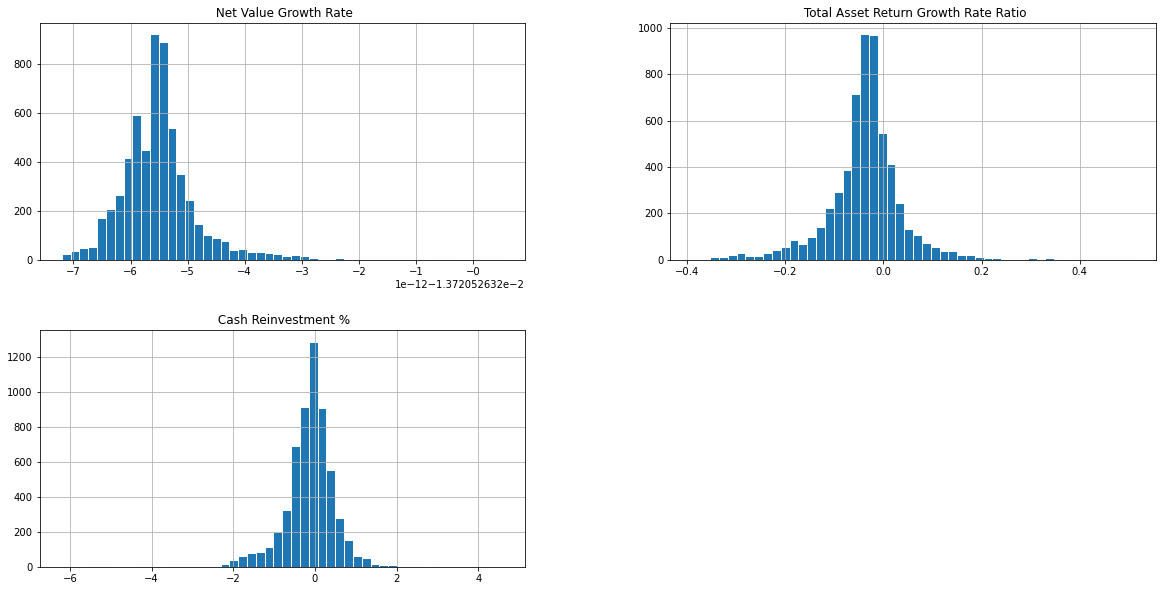

In [20]:
fig = plt.figure(figsize = (10,10), dpi = 200)

X_scaled[features].hist(bins = 100, figsize = (20,10), edgecolor='white')
plt.title('X before removing outliers Boxplot', fontsize = 20)


fig = plt.figure(figsize = (10,10), dpi = 200)

X_clean[features].hist(bins = 50, figsize = (20,10), edgecolor='white')
plt.title('X before removing outliers Boxplot', fontsize = 20)

We can visualize the stastical parameters (mean,std,min, lower whisker (25%), mean (50%), upper whisker (75%) and max:

In [21]:
X_clean.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Liability-Assets Flag,Net Income Flag
count,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,...,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000,5920.0,5920.0
mean,-0.431855,-0.420121,-0.441304,-0.134029,-0.133162,0.016821,0.010933,0.011982,-0.018988,0.009202,...,-4.949072e-02,-0.022077,-0.134030,-0.117145,0.134943,-0.046033,-0.059020,-0.282365,0.0,1.0
std,1.038164,1.093063,1.075006,0.655764,0.653788,0.013530,0.027062,0.023856,0.031392,0.025918,...,2.184460e-11,0.108041,0.655769,0.369137,0.388951,0.031123,0.191514,0.428231,0.0,0.0
min,-4.512340,-6.685868,-5.631284,-4.007503,-4.010609,-0.116658,-0.205781,-0.194305,-0.256292,-0.206291,...,-4.949072e-02,-0.614058,-4.007463,-3.090207,-0.360606,-0.226737,-1.038672,-0.714444,0.0,1.0
25%,-0.955684,-0.924091,-0.913246,-0.543898,-0.540072,0.011944,0.001476,0.003927,-0.025012,0.000936,...,-4.949072e-02,-0.038322,-0.543941,-0.215418,-0.156160,-0.057066,-0.080563,-0.555538,0.0,1.0
50%,-0.405904,-0.253776,-0.359130,-0.236083,-0.236285,0.018239,0.017414,0.018246,-0.013615,0.016106,...,-4.949072e-02,-0.009468,-0.235967,-0.003694,0.032856,-0.047812,-0.014895,-0.424794,0.0,1.0
75%,0.170717,0.175786,0.171904,0.200613,0.201602,0.023546,0.025185,0.024692,-0.006909,0.023166,...,-4.949072e-02,0.013794,0.200693,0.086505,0.329967,-0.041705,0.015373,-0.172576,0.0,1.0
max,4.196213,4.162010,4.380493,3.339965,3.434465,0.063850,0.139378,0.095934,0.201128,0.105560,...,-4.949072e-02,0.582103,3.339930,0.525804,3.745601,0.129269,0.811801,3.382875,0.0,1.0


Visualizing the data into a scatter plot we can realize that we have sufficient balance between the two classes now.

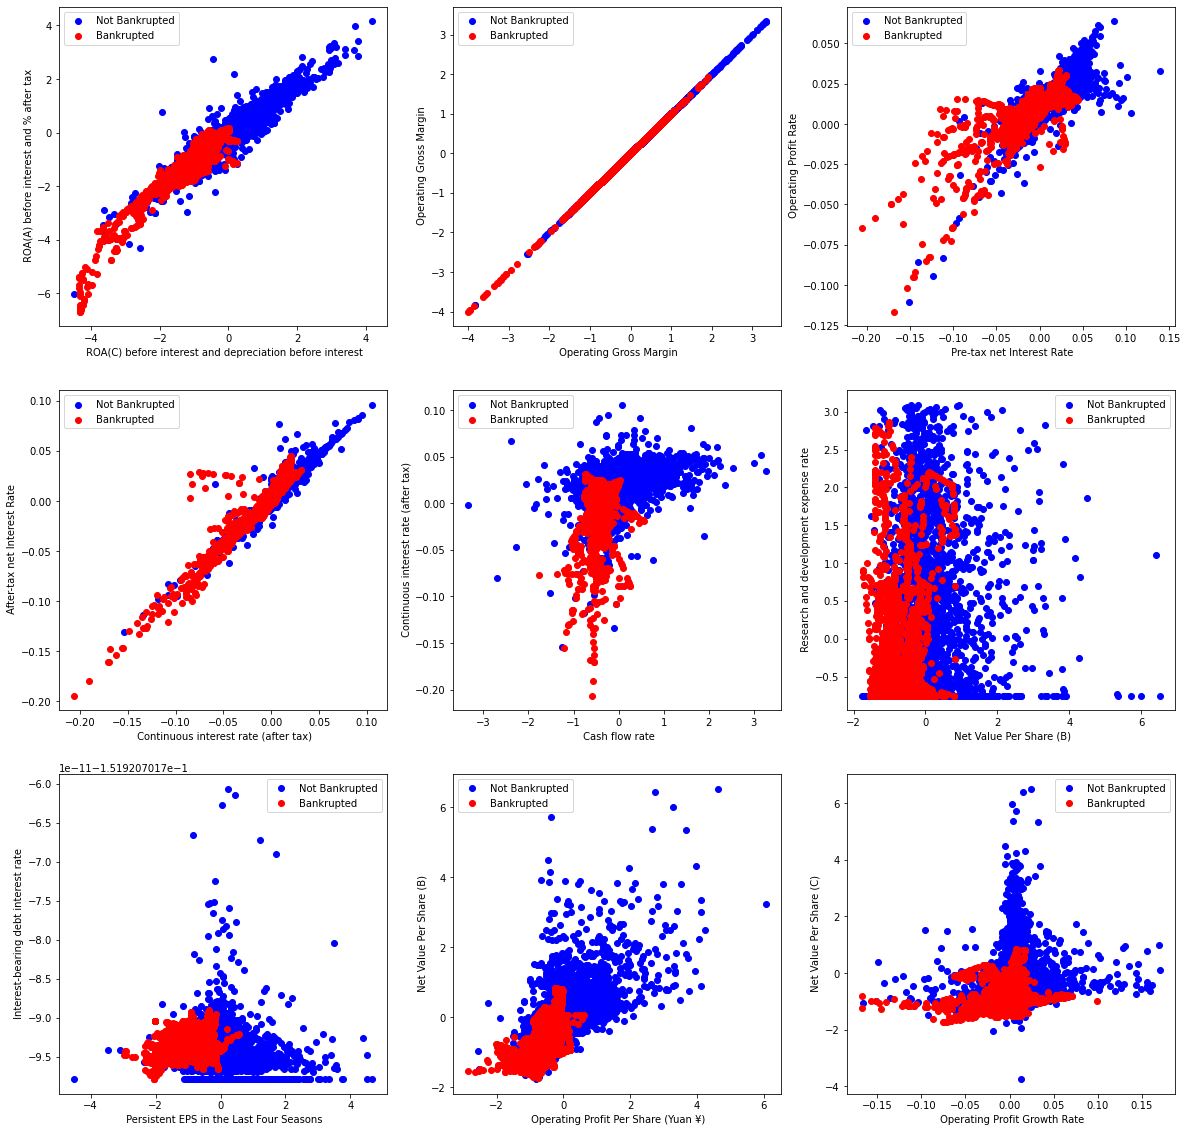

In [22]:
fig = plt.figure(figsize = (20,20))

for i in range(9):
    
    fig.add_subplot(3,3,i+1)
    
    ax_1 = 3*i
    ax_2 = 2*i+1

    plt.scatter(X_clean.values[np.where(y_clean == 0),ax_1],X_clean.values[np.where(y_clean == 0),ax_2], c = 'b')
    plt.scatter(X_clean.values[np.where(y_clean == 1),ax_1],X_clean.values[np.where(y_clean == 1),ax_2], c = 'r')
    plt.xlabel(X_clean.columns[ax_1])
    plt.ylabel(X_clean.columns[ax_2])
    plt.legend(['Not Bankrupted','Bankrupted'])

# 3. Features Selection

It is important to select the features which are more relevant for predicting the target. There are several techniques to perform feature selection, here we consider:

**1) Lasso Regularization (L1 regularization)**

**2) Random Forest**

## 3.1 Features Selection using Lasso Regularization with parameter C found by k-folds CV

We use penalty **'l1' to implement Lasso regularization**, for wich the coefficients of the features which are not relevant are set to 0. **The strenght of the regularization is given by the inverse of the parameter C**: the lower C, the stronger the regularization.

Text(0, 0.5, 'Cross-Val Accuracy')

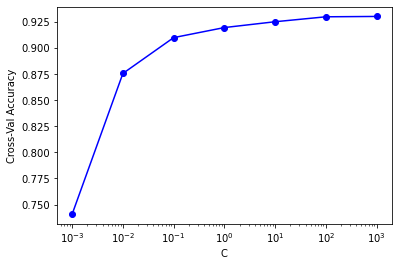

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = 10

C_values = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]

cv_score = []

penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
fit_intercept = True
multi_class = 'auto'

X = X_clean
y = y_clean

for C in C_values:
    


    log_reg = LogisticRegression(penalty = penalty, 
                                 solver = solver,
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)
    
    cross_val = cross_val_score(estimator = log_reg, X = X.values, y = y.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(C_values),np.array(cv_score),'bo-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross-Val Accuracy')

In [24]:
penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
C = 1e2
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                             solver = solver,
                             C = C, 
                             fit_intercept = fit_intercept, 
                             multi_class = multi_class)

log_reg.fit(X,y.values.ravel())

LogisticRegression(C=100.0, penalty='l1', solver='liblinear')

In [25]:
def get_lasso_dataset(log_reg,X):
    
    imortant_features = X.columns[np.where(log_reg.coef_[0] !=0)[0]]
    
    X = X[imortant_features]
    
    return X

In [26]:
X_lasso = get_lasso_dataset(log_reg,X)

In [27]:
X_lasso

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,...,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Net Income Flag
0,-1.882903,-1.720951,-1.906639,0.708800,0.710641,0.018294,-0.013819,-0.015882,-0.616334,-0.469738,...,0.948653,-1.764009,-0.021087,0.708843,-0.717717,0.839361,-0.058648,-0.087625,-0.638177,1.0
1,-0.274552,-0.205555,-0.167312,-0.256074,-0.255245,0.015807,0.017390,0.017097,-0.616334,-0.750713,...,-0.317611,-0.101984,0.005098,-0.255891,0.005824,-0.272618,-0.041520,0.017707,0.364889,1.0
2,-1.001604,-0.135767,-0.887034,0.930972,0.933046,0.016927,0.019669,-0.000649,-0.616334,-0.284988,...,0.071500,-0.071245,-0.015540,0.930920,0.017055,-0.171003,-0.009591,0.122961,-0.143918,1.0
3,-0.231170,-0.107520,-0.165574,0.010788,0.012323,0.022274,0.018584,0.017960,-0.616334,-0.750713,...,0.389322,-0.111583,-0.027424,0.010577,0.020683,0.051737,-0.003919,0.135348,-0.445843,1.0
4,-0.268125,0.024579,-0.215989,-0.084125,-0.083115,0.018552,0.053427,0.043577,-0.616334,-0.423936,...,0.479368,0.065980,-0.047985,-0.083998,0.033529,-0.266025,-0.034361,0.048529,0.307176,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,-4.352572,-5.673809,-4.886672,-0.786755,-0.786482,-0.006001,-0.064256,-0.054909,-0.616334,0.552196,...,-0.105137,-8.687799,-0.015150,-0.786817,-2.572863,0.252020,-0.049413,-0.024085,-0.421179,1.0
5916,-0.716511,-0.942498,-0.872466,-0.388286,-0.387595,0.008213,-0.002373,-0.004712,-0.616334,-0.750713,...,1.882423,-0.965435,-0.276516,-0.388303,-0.313225,0.672470,-0.073535,-0.263899,-0.615000,1.0
5917,-0.563667,-0.275921,-0.494570,-0.277309,-0.276502,0.021735,0.011974,0.009457,2.035940,-0.750713,...,0.263171,-0.329064,-0.159170,-0.277218,-0.039378,0.540239,-0.218869,0.460088,-0.602980,1.0
5918,-4.325959,-6.601768,-5.476957,-1.060768,-1.060783,-0.042793,-0.086676,-0.085793,-0.616334,-0.642443,...,-0.493317,-9.452451,-0.008943,-1.060835,-1.670173,-0.201431,-0.048015,-0.015945,0.095761,1.0


Lasso with C = 100, reduces the dataset from 95 to 83 features, with a cross-validation accuracy of ~93%.

## 3.2 Features Selection using Random Forest Classifier with number of features chosen via Cross-Validation

In [28]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

def get_RF_features_importances(X,y,n_features, plot):
    
    rf = RandomForestClassifier()
    
    rf.fit(X,y)
    
    features_names = X.columns
    
    data = {'feature_name' : features_names,'feature_importance' : rf.feature_importances_}
    
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by = ['feature_importance'], ascending=False,inplace=True)
    
    selected_features = fi_df['feature_name'].values[:n_features]
    
    X_rf = X[selected_features]
    
    if plot:

        #Define size of bar plot
        plt.figure(figsize = (20,16))
        #Plot Searborn bar chart
        sns.barplot(x = fi_df['feature_importance'], y = fi_df['feature_name'])
        #Add chart labels
        plt.title('Random Forest Feature Importance')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature Name')
    

    return X_rf

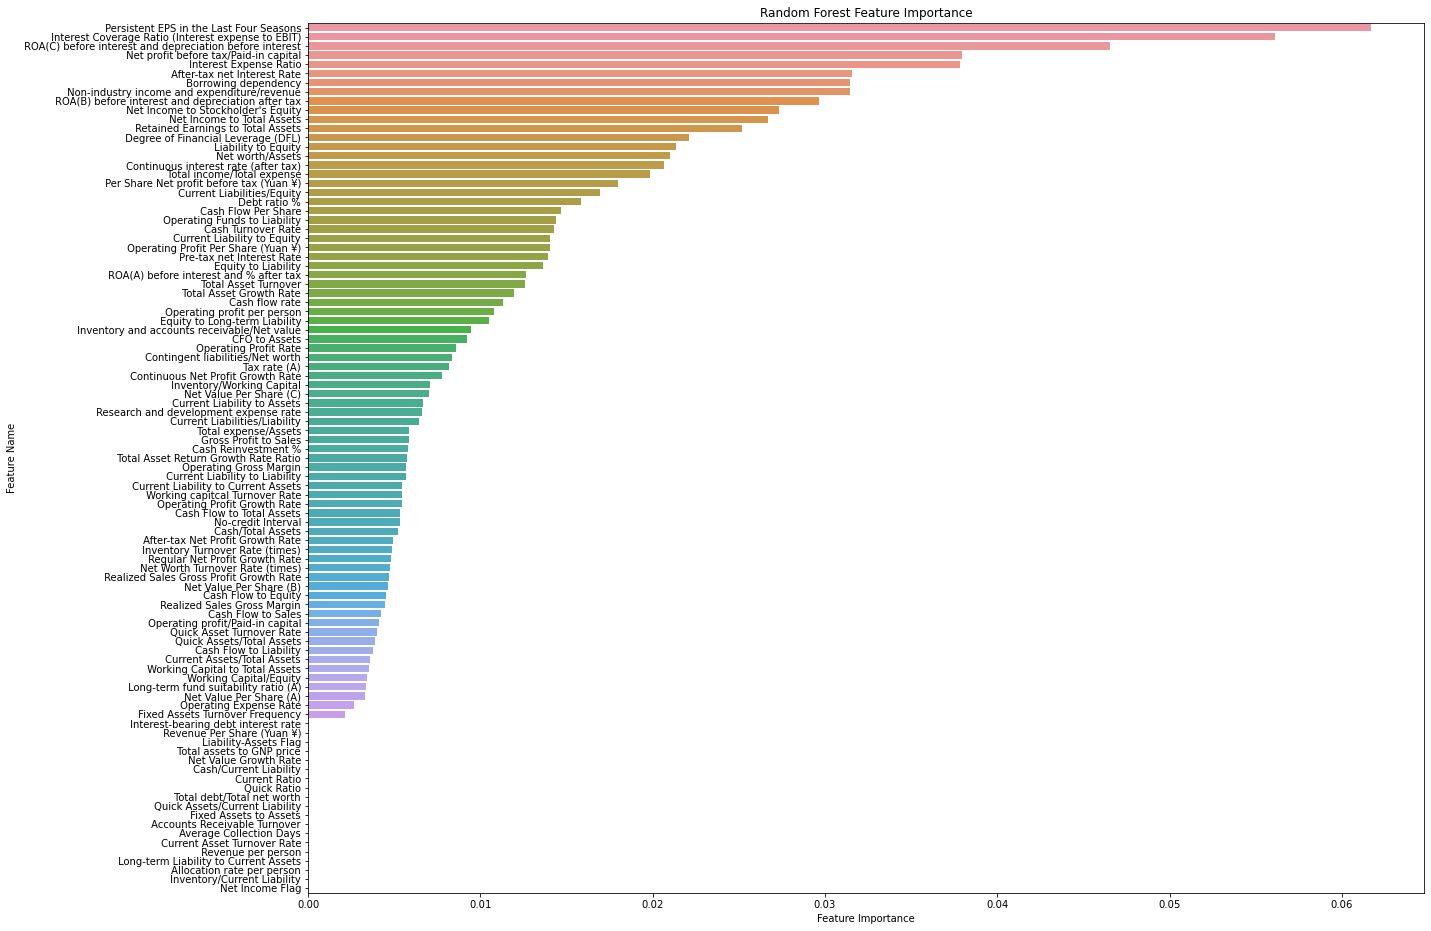

In [29]:
n_features = 20

X_rf = get_RF_features_importances(X,y.values.ravel(),n_features, plot = True)


In [30]:
X_rf

,Persistent EPS in the Last Four Seasons,Interest Coverage Ratio (Interest expense to EBIT),ROA(C) before interest and depreciation before interest,Net profit before tax/Paid-in capital,Interest Expense Ratio,After-tax net Interest Rate,Borrowing dependency,Non-industry income and expenditure/revenue,ROA(B) before interest and depreciation after tax,Net Income to Stockholder's Equity,Net Income to Total Assets,Retained Earnings to Total Assets,Degree of Financial Leverage (DFL),Liability to Equity,Net worth/Assets,Continuous interest rate (after tax),Total income/Total expense,Per Share Net profit before tax (Yuan ¥),Current Liabilities/Equity,Debt ratio %
0,-2.024355,-0.087625,-1.882903,-1.779450,-0.089260,-0.009059,0.635229,-0.072430,-1.906639,-0.717717,-1.764009,-0.911158,-0.058648,0.839361,-1.908971,-0.015882,-0.035413,-1.670268,0.443553,1.908971
1,-0.313120,0.017707,-0.274552,-0.342924,-0.006765,0.018714,-0.270243,-0.003532,-0.167312,0.005824,-0.101984,0.018287,-0.041520,-0.272618,1.012430,0.017097,-0.022741,-0.337696,-0.245943,-1.012430
2,-0.725295,0.122961,-1.001604,-0.363502,0.098311,0.022466,-0.094642,-0.001648,-0.887034,0.017055,-0.071245,-0.069537,-0.009591,-0.171003,0.348526,-0.000649,-0.024164,-0.358127,-0.249706,-0.348526
3,-0.284695,0.135348,-0.231170,-0.306178,0.123391,0.019173,0.162887,-0.016848,-0.165574,0.020683,-0.111583,-0.179683,-0.003919,0.051737,-0.583967,0.017960,-0.022817,-0.303644,-0.021916,0.583967
4,-0.259111,0.048529,-0.268125,-0.245180,0.022094,0.049818,-0.146560,0.062400,-0.215989,0.033529,0.065980,0.285008,-0.034361,-0.266025,0.962525,0.043577,0.000234,-0.246890,-0.292047,-0.962525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,-1.647672,-0.024085,-4.352572,-1.676267,-0.040659,-0.057671,0.219153,-0.114785,-4.886672,-2.572863,-8.687799,-6.971151,-0.049413,0.252020,-0.893663,-0.054909,-0.049662,-1.583273,0.368698,0.893663
5916,-1.045130,-0.263899,-0.716511,-0.904564,-0.192785,0.000190,0.904879,-0.024802,-0.872466,-0.313225,-0.965435,-0.731374,-0.073535,0.672470,-1.703330,-0.004712,-0.040156,-0.884369,0.530284,1.703330
5917,-0.523101,0.460088,-0.563667,-0.493208,0.686739,0.013996,0.775031,-0.028869,-0.494570,-0.039378,-0.329064,-0.143652,-0.218869,0.540239,-1.579973,0.009457,-0.028752,-0.478296,0.588834,1.579973
5918,-2.024330,-0.015945,-4.325959,-1.845449,-0.034338,-0.084903,-0.264270,-0.070252,-5.476957,-1.670173,-9.452451,-5.572207,-0.048015,-0.201431,0.652497,-0.085793,-0.053468,-1.771277,-0.168064,-0.652497


Text(0, 0.5, 'Cross-Val Accuracy')

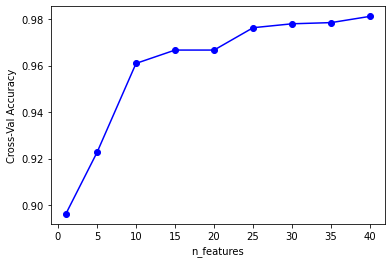

In [31]:
cv = 10

n_features = [1, 5, 10, 15, 20, 25,30,35, 40]

cv_score = []


for n_ftrs in n_features:
    
    X_rf = get_RF_features_importances(X,y.values.ravel(),n_ftrs, plot = False)

    rf_clf = RandomForestClassifier()
    
    cross_val = cross_val_score(estimator = rf_clf, X = X_rf.values, y = y.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(n_features),np.array(cv_score),'bo-')
plt.xlabel('n_features')
plt.ylabel('Cross-Val Accuracy')

With Random Forest, we have identified 20 features wich are importan to predict the target. Selecting a smaller number of features allows for a higher interpretability of the dataset. Comparison features selection with Lasso and Random Forest:

**Lasso**: C = 100, 78 filtered features, cross-validation accuracy ~ 93%

**Random Forest**: 25 filtered features, cross-validation accuracy ~ 97.5%

# 4. Data Analysis on the Preprocessed Dataset

In [32]:
# first we get Random Forest dataset for the original dataset, not training/test separately

n_features = 35

X_rf = get_RF_features_importances(X,y.values.ravel(), n_features = 35, plot = False)

X_rf

,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Continuous interest rate (after tax),Interest Coverage Ratio (Interest expense to EBIT),Borrowing dependency,Non-industry income and expenditure/revenue,Net Income to Total Assets,Persistent EPS in the Last Four Seasons,Degree of Financial Leverage (DFL),Total income/Total expense,...,ROA(A) before interest and % after tax,Cash Flow Per Share,Operating Profit Rate,Current Liability to Assets,Operating profit per person,Total Asset Turnover,Operating Funds to Liability,Equity to Long-term Liability,Operating profit/Paid-in capital,Inventory and accounts receivable/Net value
0,-1.882903,-1.906639,-0.015882,-0.087625,0.635229,-0.072430,-1.764009,-2.024355,-0.058648,-0.035413,...,-1.720951,-0.385880,0.018294,0.502079,-0.229175,-0.406929,-0.391169,0.251781,-0.327946,-0.141473
1,-0.274552,-0.167312,0.017097,0.017707,-0.270243,-0.003532,-0.101984,-0.313120,-0.041520,-0.022741,...,-0.205555,-0.267381,0.015807,-0.648549,-0.266844,0.126730,-0.238648,-0.241268,-0.495603,-0.375065
2,-1.001604,-0.887034,-0.000649,0.122961,-0.094642,-0.001648,-0.071245,-0.725295,-0.009591,-0.024164,...,-0.135767,-0.205119,0.016927,-0.848702,-0.251638,-0.777526,-0.206900,0.041681,-0.468344,-0.392663
3,-0.231170,-0.165574,0.017960,0.135348,0.162887,-0.016848,-0.111583,-0.284695,-0.003919,-0.022817,...,-0.107520,-0.128798,0.022274,0.099413,0.035891,-0.169747,-0.228807,0.067137,-0.148271,-0.113116
4,-0.268125,-0.215989,0.043577,0.048529,-0.146560,0.062400,0.065980,-0.259111,-0.034361,0.000234,...,0.024579,-0.315584,0.018552,-1.032314,-0.212241,-1.207419,-0.334660,-0.100485,-0.475964,-0.589552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,-4.352572,-4.886672,-0.054909,-0.024085,0.219153,-0.114785,-8.687799,-1.647672,-0.049413,-0.049662,...,-5.673809,-0.195646,-0.006001,1.209327,-0.765773,-0.141246,0.046257,-0.241268,-0.960080,0.848302
5916,-0.716511,-0.872466,-0.004712,-0.263899,0.904879,-0.024802,-0.965435,-1.045130,-0.073535,-0.040156,...,-0.942498,-0.378628,0.008213,0.964293,-0.455425,-0.647067,-0.392513,0.691436,-0.795290,-0.136732
5917,-0.563667,-0.494570,0.009457,0.460088,0.775031,-0.028869,-0.329064,-0.523101,-0.218869,-0.028752,...,-0.275921,-0.312659,0.021735,1.482899,0.195114,-1.012130,-0.368748,0.261819,-0.328670,0.979681
5918,-4.325959,-5.476957,-0.085793,-0.015945,-0.264270,-0.070252,-9.452451,-2.024330,-0.048015,-0.053468,...,-6.601768,-0.184075,-0.042793,-0.339864,-1.221206,-0.344075,0.367011,-0.241268,-1.658112,-0.169773


## 4.1 Features Correlations

<AxesSubplot:>

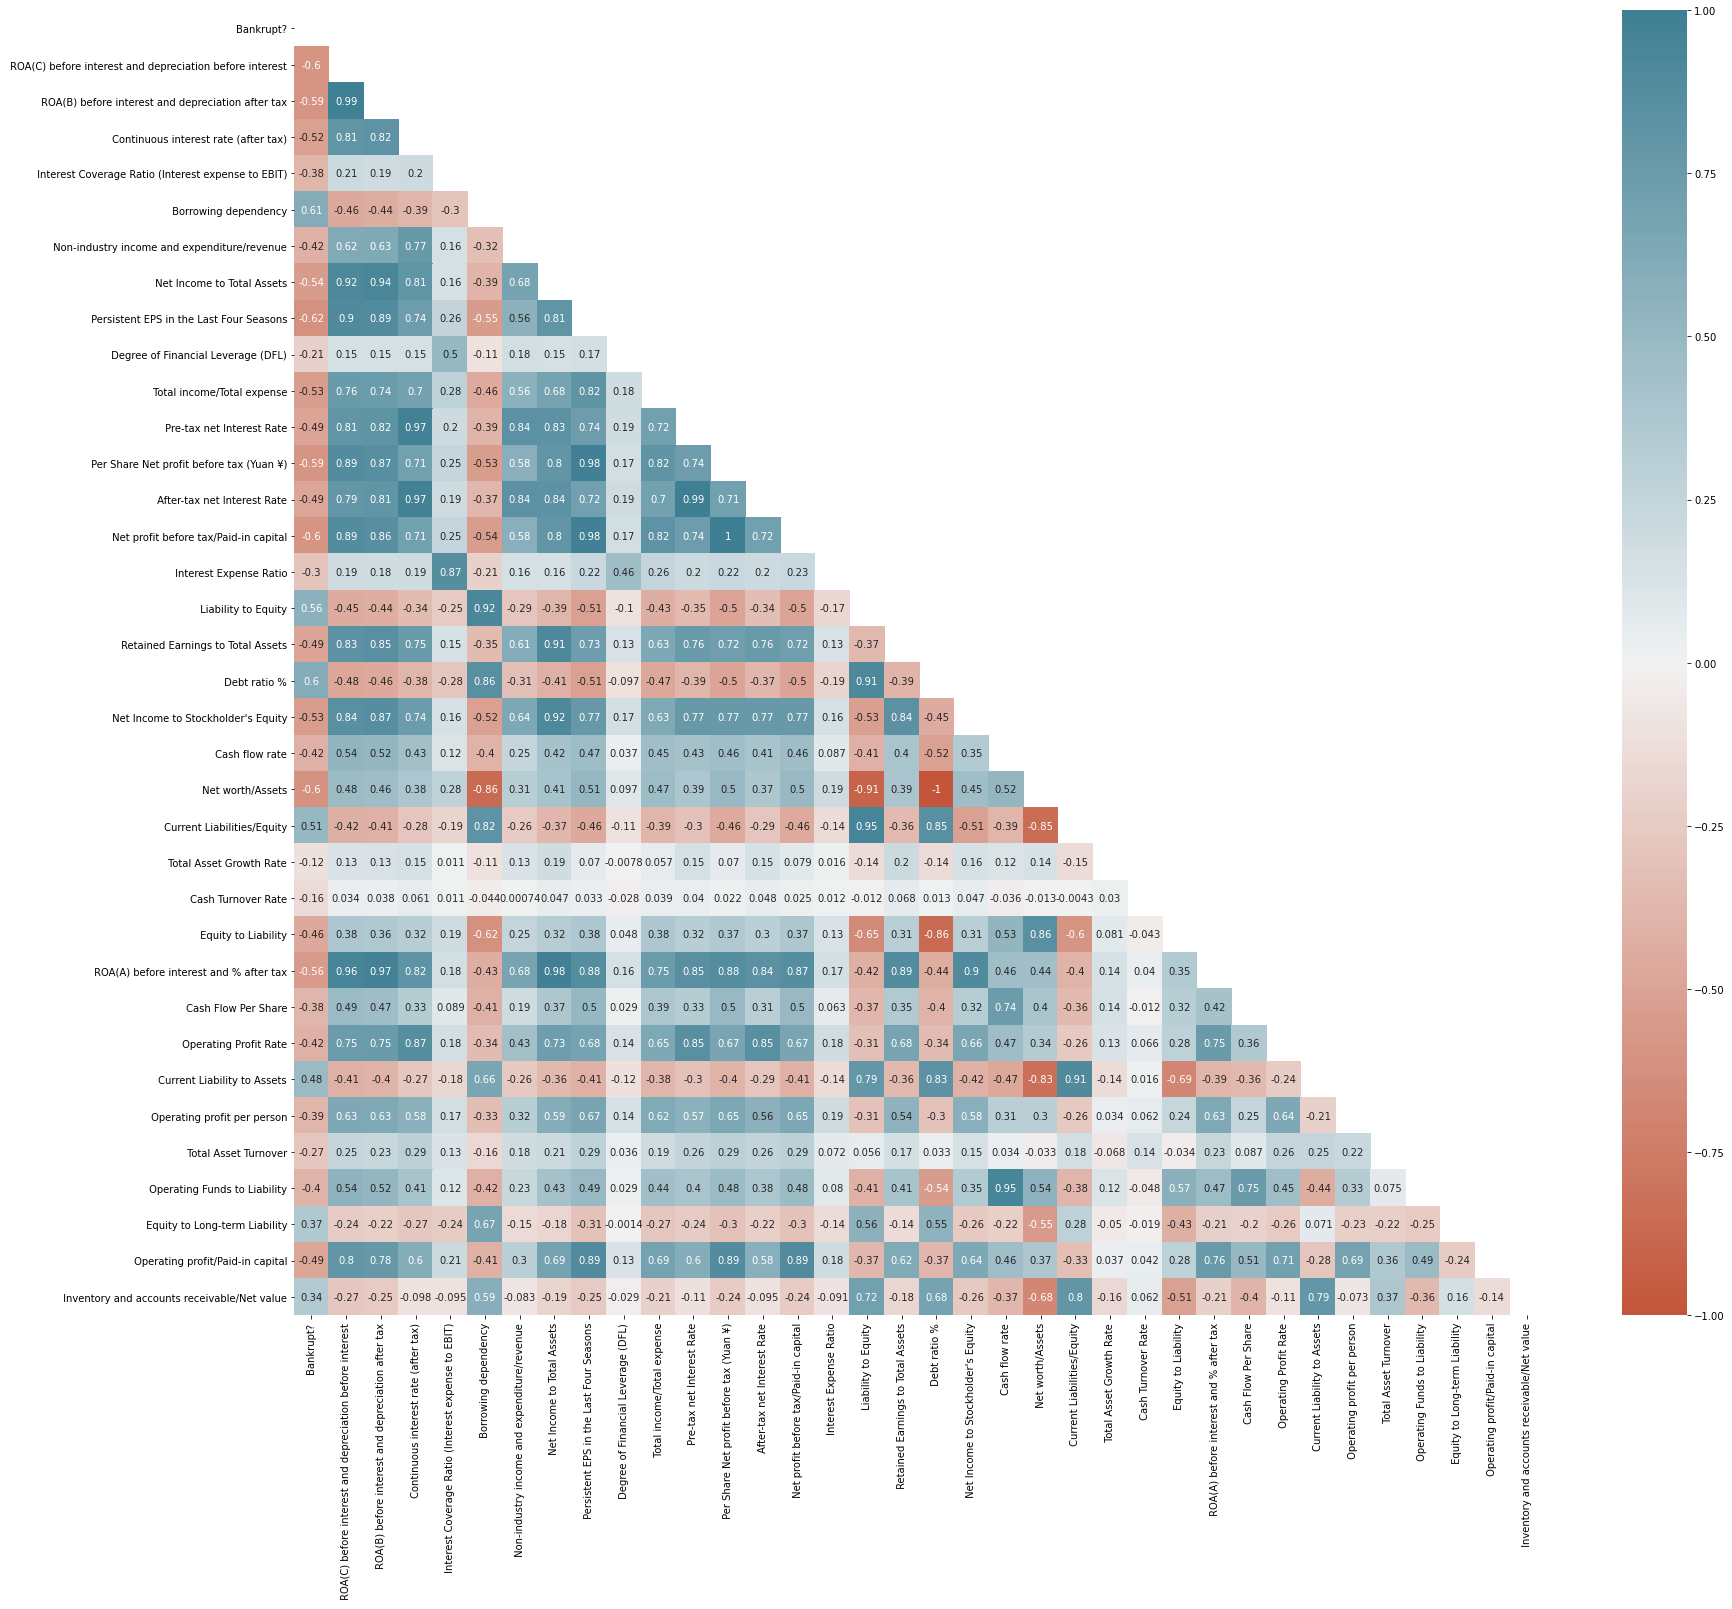

In [33]:
fig, ax = plt.subplots(figsize=(28,24))

mask = np.zeros_like(pd.concat([y,X_rf],axis = 1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pd.concat([y,X_rf],axis = 1).corr(), 
            mask=mask,
            vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

As expected, all the features extracted by Random Forest are correlated to the target. With the heatmap, we can identify some patterns in the data and identify the features with the strongest positive and negative correlations with the target. The barplot below sorts the features by strongest positive/negative correlations.

Text(0, 0.5, 'Feature Name')

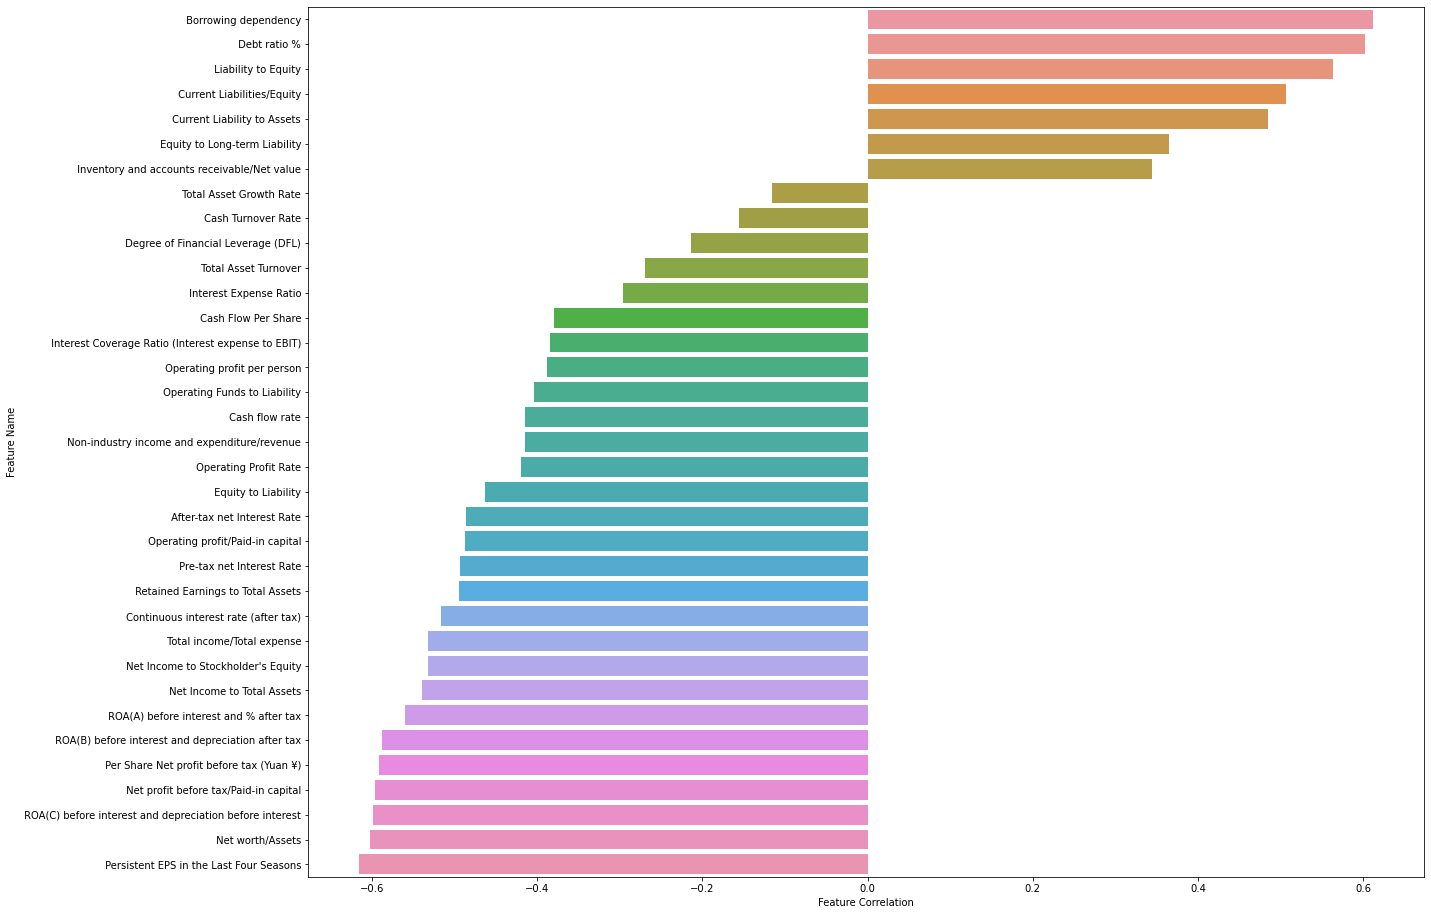

In [34]:
features_names = X_rf.columns

corr = pd.concat([y,X_rf],axis = 1).corr().values[0,1:]
    
data = {'feature_name' : features_names, 'corr' : corr}
    
corr_df = pd.DataFrame(data)
    
#Sort the DataFrame in order decreasing feature importance
corr_df.sort_values(by = ['corr'], ascending = False,inplace=True)

plt.figure(figsize = (20,16))
#Plot Searborn bar chart
sns.barplot(x = corr_df['corr'], y = corr_df['feature_name'])
#Add chart labels
plt.xlabel('Feature Correlation')
plt.ylabel('Feature Name')
    

In [35]:
print('Top 4 features with strongest positive correlation with the target:')
print('')
for i in range(4):
    
    print('{} : corr = {:.2f}'.format(corr_df.values[i,0], corr_df.values[i,1]))

Top 4 features with strongest positive correlation with the target:

 Borrowing dependency : corr = 0.61
 Debt ratio % : corr = 0.60
 Liability to Equity : corr = 0.56
 Current Liabilities/Equity : corr = 0.51


In [36]:
print('Top 4 features with strongest negative correlation with the target:')
print('')

for i in range(4):
    
    print('{} : corr = {:.2f}'.format(corr_df.values[::-1][i,0], corr_df.values[::-1][i,1]))

Top 4 features with strongest negative correlation with the target:

 Persistent EPS in the Last Four Seasons : corr = -0.62
 Net worth/Assets : corr = -0.60
 ROA(C) before interest and depreciation before interest : corr = -0.60
 Net profit before tax/Paid-in capital : corr = -0.60


**Scatterplots of the top 4 features with strongest positive correlation with the target**

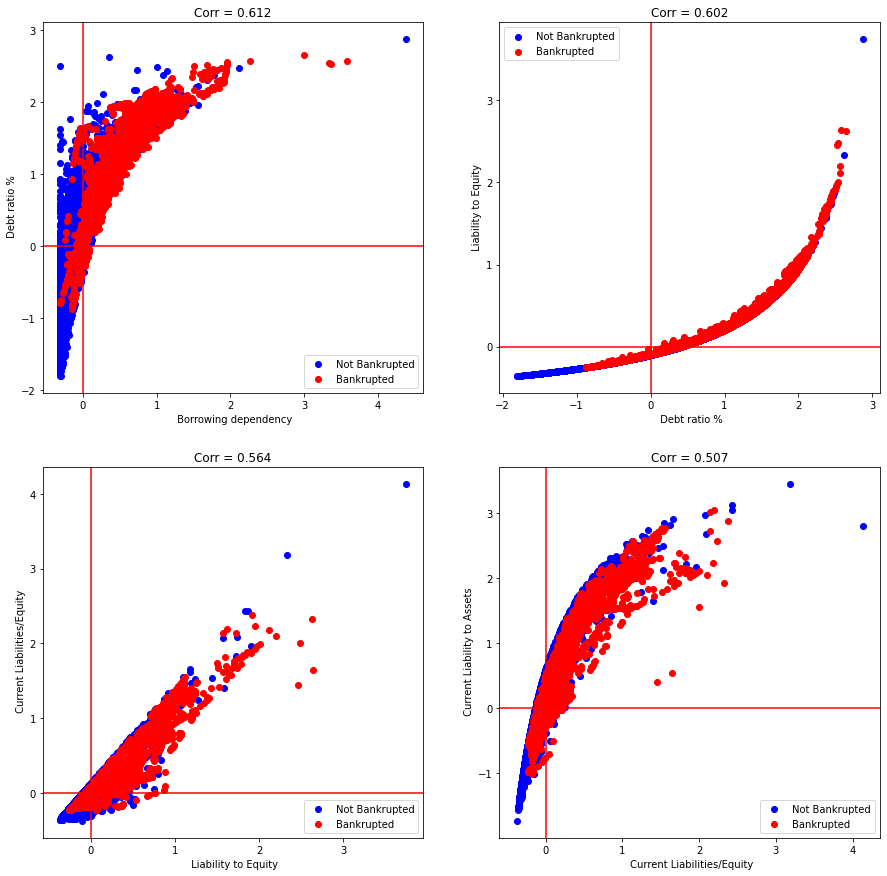

In [37]:
# scatterplot of features with strongest negative correlation with the target

fig = plt.figure(figsize = (15,15))


for i in range(4):
    
    fig.add_subplot(2,2,i+1)
    
    ax_1 = corr_df.values[i,0]
    ax_2 = corr_df.values[i + 1,0]

    plt.scatter(X_rf[ax_1].values[np.where(y == 0)[0]],
            X_rf[ax_2].values[np.where(y == 0)[0]],
           c = 'b')

    plt.scatter(X_rf[ax_1].values[np.where(y == 1)[0]],
            X_rf[ax_2].values[np.where(y == 1)[0]],
           c = 'r')
    
    plt.xlabel(ax_1)
    plt.ylabel(ax_2)
    plt.title('Corr = {:.3f}'.format(corr_df.values[i,1]))
    plt.legend(['Not Bankrupted','Bankrupted'])
    
    plt.axhline(y = 0, c = 'r')
    plt.axvline(x = 0, c = 'r')

The companies labeled as 'Bankrupted' are all in the top-right side of the scatterplots, given the positive correlations.

**Scatterplots of the top 4 features with strongest negative correlation with the target**

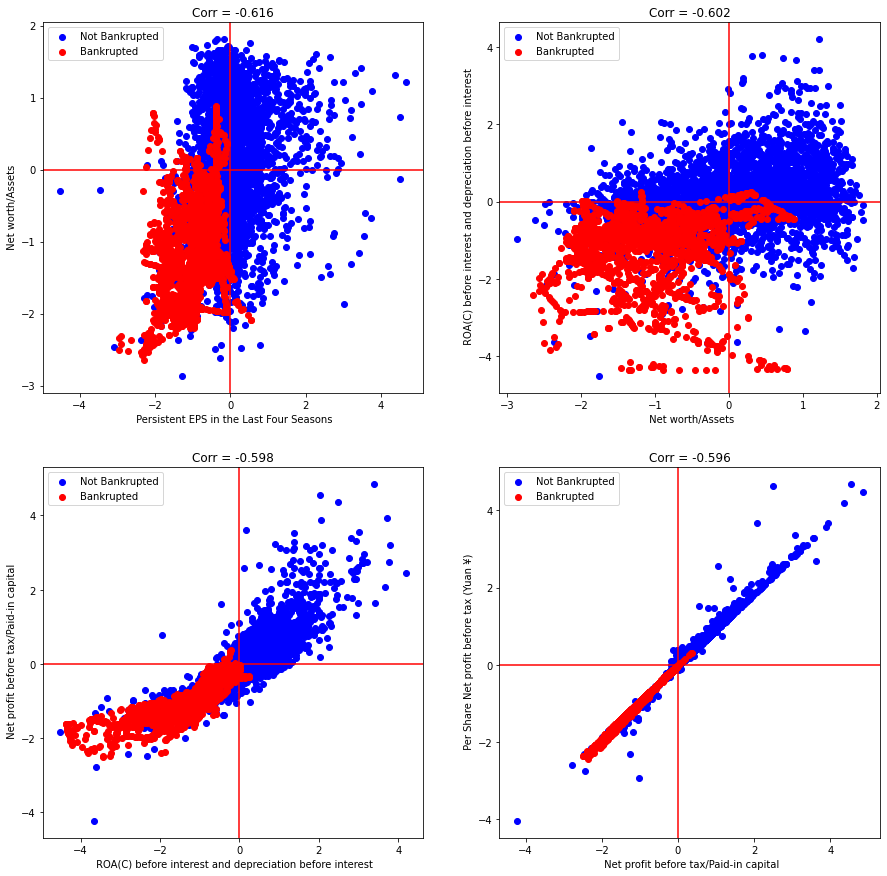

In [38]:
# scatterplot of features with strongest negative correlation with the target

fig = plt.figure(figsize = (15,15))


for i in range(4):
    
    fig.add_subplot(2,2,i+1)
    
    ax_1 = corr_df.values[::-1][i,0]
    ax_2 = corr_df.values[::-1][i + 1,0]

    plt.scatter(X_rf[ax_1].values[np.where(y == 0)[0]],
            X_rf[ax_2].values[np.where(y == 0)[0]],
           c = 'b')

    plt.scatter(X_rf[ax_1].values[np.where(y == 1)[0]],
                X_rf[ax_2].values[np.where(y == 1)[0]],
               c = 'r')
    
    
    plt.xlabel(ax_1)
    plt.ylabel(ax_2)
    plt.title('Corr = {:.3f}'.format(corr_df.values[::-1][i,1]))
    plt.legend(['Not Bankrupted','Bankrupted'])
    
    plt.axhline(y = 0, c = 'r')
    plt.axvline(x = 0, c = 'r')

The companies labeled as 'Bankrupted' are all in the bottom-left side of the scatterplots, given the negative correlations.

We can also plot the boxplots of the features of interest, splitted in the two classes. For the features with strong negative correlation, we expect the boxplots to show that main distribution (inside the box, 50% of the data) of the 'Bankrupt' class (1), to have negative values, and lower than the values in the boxplots of the 'Not Bankrupt' class (0).

On the contrary, for the features with positive correlation, we expect the boxplots to show that main distribution  of the 'Bankrupt' class (1), to have positive values, and higher than the values in the boxplots of the 'Not Bankrupt' class (0).


**Boxplots of the top 4 features with strongest positive correlation with the target**

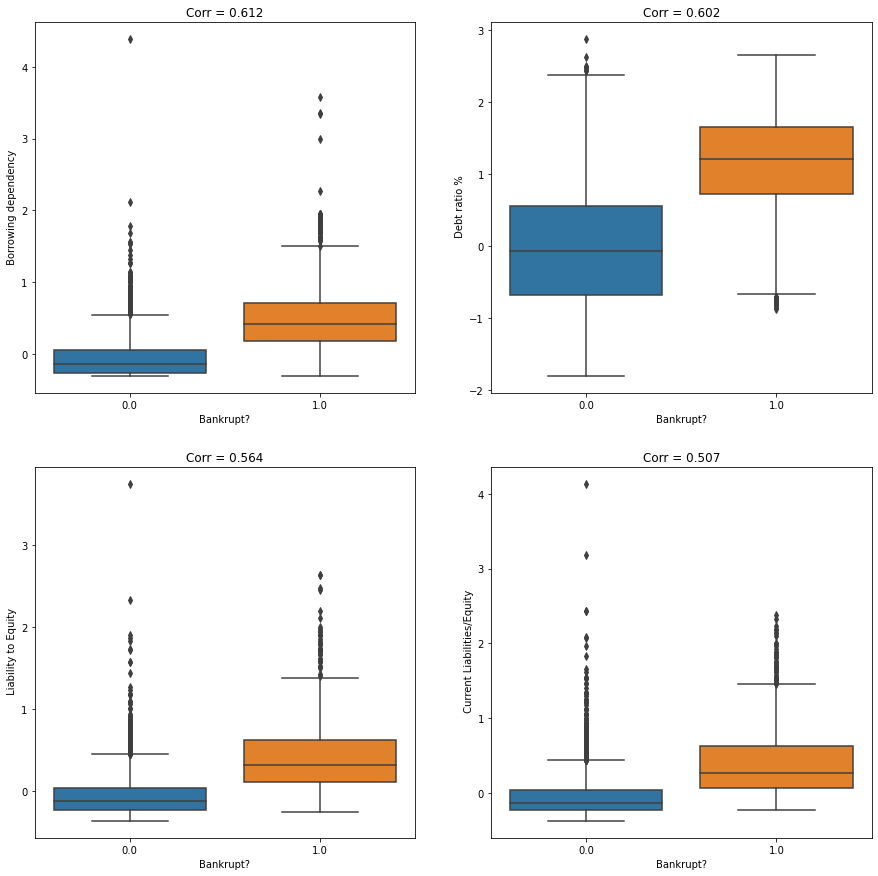

In [39]:
fig = plt.figure(figsize = (15,15))


for i in range(4):
    
    fig.add_subplot(2,2,i+1)
    
    ax = corr_df.values[i,0]
    

    plt.title('Corr = {:.3f}'.format(corr_df.values[i,1]))

    sns.boxplot(x = y_clean.columns[0],
                y = X_rf[ax], 
              data = pd.concat([X_rf,y_clean],axis = 1))
            

**Boxplots of the top 4 features with strongest nevative correlation with the target**

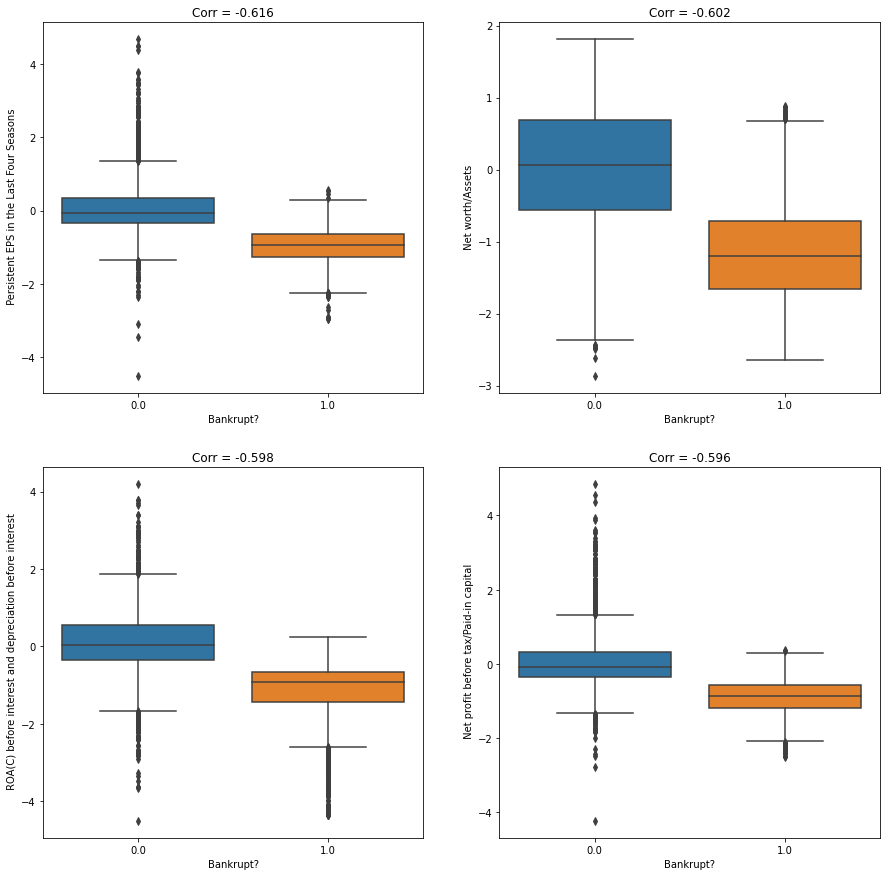

In [40]:
fig = plt.figure(figsize = (15,15))


for i in range(4):
    
    fig.add_subplot(2,2,i+1)
    
    ax = corr_df[::-1].values[i,0]
    
    plt.title('Corr = {:.3f}'.format(corr_df[::-1].values[i,1]))

    sns.boxplot(x = y_clean.columns[0],
                y = X_rf[ax], 
                data = pd.concat([X_rf,y_clean],axis = 1))
            

## 4.2 PCA

Performing PCA, we can identify reduced dimension which explain most of the variance in the dataset.

In [41]:
from sklearn.decomposition import PCA

def get_pca(X, n_components):

    pca = PCA(n_components = n_components)

    pca.fit(X)

    X_pca = pca.fit_transform(X)

    X_pca = pd.DataFrame(X_pca)
    
    fn = []
    
    for i in range(n_components):
        
        fn.append('component ' + str(i + 1))
        
    X_pca.columns = fn
    
    pve = pca.explained_variance_ratio_
    
    #for i in range(n_components):
    
       # print('PVE component {}: {:.1f} %'.format(i + 1, pve[i] * 100))
    print('Cumulative PVE with {} components: {:.1f}%'.format(n_components,sum(pve)*100))
    
    return X_pca, pca, pve

def get_scree_plot(X,n_components):
    
    cumulative_pve = np.zeros((len(n_components)))
    
    for i,n in enumerate(n_components):
        
        _, _, pve = get_pca(X,n)
        
        
        cumulative_pve[i] += 100 * sum(pve)
        
    fig = plt.figure(figsize = (5,5))
        
    plt.plot(n_components, cumulative_pve,'bo-')
    plt.xlabel('N. components')
    plt.ylabel('Cumulative PVE')
        
        
# the biplot illustrates the loading vectors of each features and 
# the data plotted in the principal component space

# in an element phi_jm of the loading vector phi_m of the feature m associated with the feature j
# has a high positive value, it means that the feature j has a high contribution to the component m


def get_biplot(X_pca,y,comp_ax_hor,comp_ax_ver,features_names):
    
    score = X_pca.values
    coeff = np.transpose(pca.components_[[comp_ax_hor-1,comp_ax_ver-1], :])
    
    
    ax_1 = score[:,0]
    ax_2 = score[:,1]
    n = coeff.shape[0]
    scale_ax_1 = 1.0/(ax_1.max() - ax_1.min())
    scale_ax_2 = 1.0/(ax_2.max() - ax_2.min())
    
    fig = plt.figure(figsize = (10,10))
    plt.scatter(ax_1[np.where(y == 0)[0]] * scale_ax_1,
                ax_2[np.where(y == 0)[0]] * scale_ax_2,
                c = 'b',
                s=5)
    

    plt.scatter(ax_1[np.where(y == 1)[0]] * scale_ax_1,
                ax_2[np.where(y == 1)[0]] * scale_ax_2,
                c = 'r',
                s=5)
    
    plt.xlabel('Component {}'.format(comp_ax_hor))
    plt.ylabel('Component {}'.format(comp_ax_ver))
    plt.legend(['Not Bankrupted','Bankrupted'])
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if features_names is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features_names[i], color = 'g', ha = 'center', va = 'center')
        


Cumulative PVE with 1 components: 57.7%
Cumulative PVE with 5 components: 88.3%
Cumulative PVE with 10 components: 96.8%
Cumulative PVE with 15 components: 99.0%
Cumulative PVE with 20 components: 99.8%


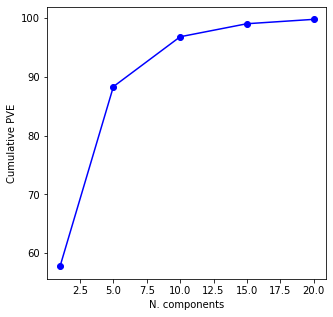

In [42]:
get_scree_plot(X_rf, n_components = [1,5,10,15,20])

The **elbow** of the **scree plot** corresponds to **10 principal components**.

Cumulative PVE with 10 components: 96.8%


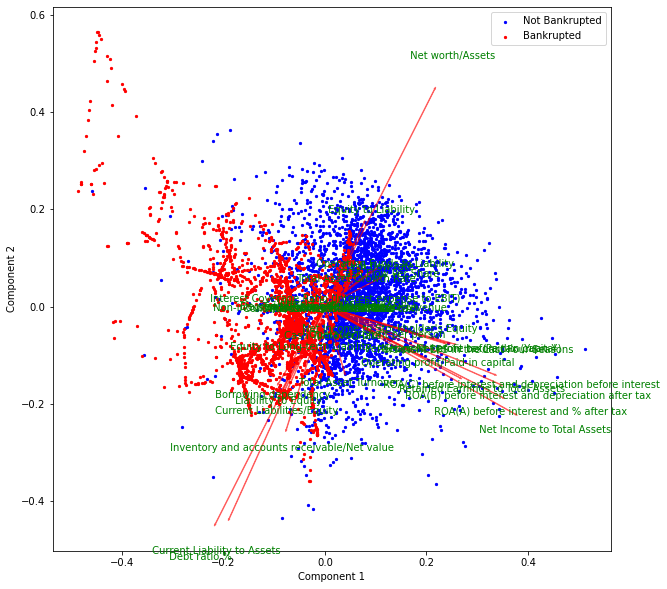

In [45]:
X_pca,pca,_ = get_pca(X_rf, n_components = 10)

comp_ax_hor = 1

comp_ax_ver = 2

features_names = X_rf.columns

get_biplot(X_pca,y,comp_ax_hor, comp_ax_ver, features_names )

The biplot illustrates that Bankrupted companies tend to have negative values of the first component, where Current Liability to Assets, Debt ratio % and Borrow dependency (in particular) have positive values: it means that these high values of these features tend to represent Bankrupted companies. 

On the other hand, Not Bankrupted companies have positive values of the first components, which are representative (in particular) of Net Income to Total Assets, ROA(A), ROA(B) and ROA(C). Strong of these features tend to represent Not Bankrupted companies.

These analysis made for the Biplot is in line to the analysis made for the Heatmap about the positive/negative correlations between the features and the target.


Since a dataset reduced to 10 components reprents the 97% of variance of the original dataset, we can use the reduced dataset to fit classifiers, being sure that the most significant statistical information is retained in this dataset.

The performed data analysis involving features scaling, balancing classes, outliers removal, features selection and dimensionality reduction has provided a suitable dataset to fit ML models.

In [46]:
X_pca

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10
0,-4.124482,-0.178881,-0.470640,-0.375481,-0.238444,-0.828893,0.009938,0.508623,-0.024263,-0.281969
1,1.465943,2.042401,0.045310,-0.655206,-0.121749,0.979638,-0.377708,0.363609,-0.151488,0.125285
2,0.526037,1.743439,0.059352,-0.727932,-0.739573,0.144381,0.106139,0.126389,0.058867,-0.500498
3,0.601739,-0.193192,-1.047352,0.461585,0.001655,-0.199391,0.297988,0.031556,-0.227122,0.112141
4,1.718162,2.220943,-0.191085,-1.042112,-0.840827,0.460979,0.205493,-0.336883,0.267845,-0.128995
...,...,...,...,...,...,...,...,...,...,...
5915,-11.423936,4.461693,2.963858,2.973318,4.100149,-0.929954,1.626066,-0.268039,0.569986,1.431006
5916,-2.215534,-1.024596,-0.211040,-1.006330,-0.312051,-0.735227,0.279291,-0.012429,-0.199388,0.315953
5917,-0.961397,-1.917792,-0.375822,-0.761456,-0.003441,-0.170664,0.156843,-0.689637,0.604992,-0.088470
5918,-10.843732,7.615303,2.803231,1.891557,3.620867,-0.633109,1.191805,0.321731,0.666741,0.417055


# 5. Training-Test Splitting

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size = 0.33, random_state = 42)

# 6. Fitting Classifiers

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,precision_recall_curve,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix


def plot_classification_performance(clf,X,y_true, step, binary):
   
    '''
    performance of classification is evaluated with:
    
    1) accuracy: (TP + TN)/(TP + TN + FP + FN)
    
    2) precision: TP / (TP + FP)
    
    3) recall (sensitivity, true positive rate): TP / (TP + FN)
    
    4) f_score: 2 * precision * recall / (precision + recall)
    
    5) precsion_recall_curve: x-axis: precision, y-axis: recall
    
    6) roc_curve: x-axis: true positive rate, y-axis: false positive rate
                
                true positive rate (recall, sensitivity): TP / (TP + FN)
                false positive rate (fall out, 1 - specificity): FP / (FP + TN) = 1 - specificity = 1 - TN / (TN + FP)
                
                specifity (or true negative rate): TN / (TN + FP) 
                
    ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
    
    Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
    
    ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
    
    7) confusion_matrix = [TP  FP
                           FN  TN]  
    
    '''
    
    accuracy = clf.score(X,y_true)
    
    if binary:
    
       
    
        y_pred = clf.predict(X)
        
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
    
    
        plot_roc_curve(clf, X, y_true)
        plt.title('{} ROC curve'.format(step))
    
        plot_precision_recall_curve(clf, X, y_true)
        plt.title('{} Precision Recall curve'.format(step))
        
        
        plot_confusion_matrix(clf,X, y_true)
        plt.title('{} Confusion Matrix'.format(step))
        
    else:
        
        
        n_classes = len(clf.classes_)
        #y_score = clf.predict_proba(X)
        y_score = clf.decision_function(X)
        y_pred = clf.predict(X)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
    
        precision = dict()
        recall = dict()
        f_score = dict()
    
        y_true_dummies = pd.get_dummies(y_true, drop_first = False).values
    
        for i in range(n_classes):
        
            fpr[i], tpr[i], _ = roc_curve(y_true_dummies[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
            precision[i], recall[i],_ =  precision_recall_curve(y_true_dummies[:, i], y_score[:, i])
            
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
                                                                
       
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('{} ROC curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label = 'Class {} (area = {:.2f})'.format(i, roc_auc[i]))
    
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)

        ax.set_xlabel('Precision')
        ax.set_ylabel('Recall')
        ax.set_title('{} Precision Recall curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(precision[i], recall[i], label = 'Class {}'.format(i))
        
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        plot_confusion_matrix(clf,X,y_true)
        
        
    

## 6.1 Random Forest Classifier

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2274
         1.0       1.00      1.00      1.00      1692

    accuracy                           1.00      3966
   macro avg       1.00      1.00      1.00      3966
weighted avg       1.00      1.00      1.00      3966



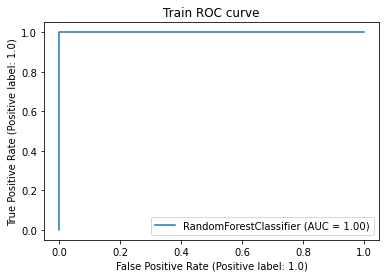

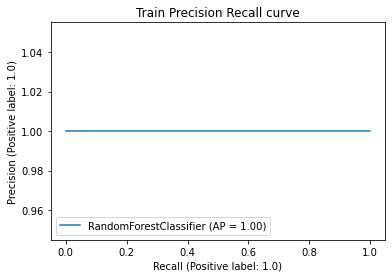

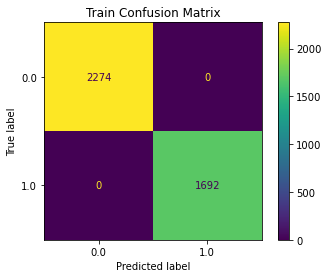

In [49]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

plot_classification_performance(rf, X_train,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1144
         1.0       0.95      0.99      0.97       810

    accuracy                           0.97      1954
   macro avg       0.97      0.98      0.97      1954
weighted avg       0.98      0.97      0.97      1954



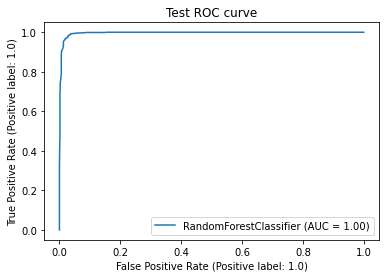

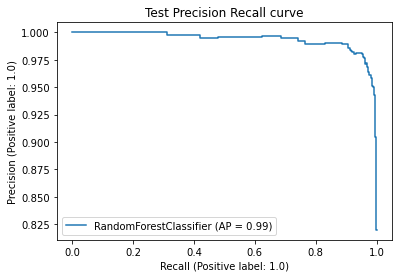

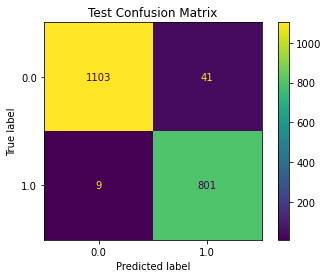

In [50]:
plot_classification_performance(rf, X_test,y_test, step ='Test', binary = True)

## 6.2 Support Vector Classifier with C chosen via Cross-Validation

Text(0, 0.5, 'Cross-Val Accuracy')

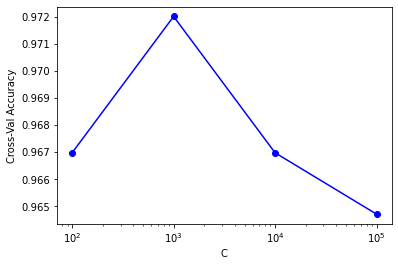

In [51]:
from sklearn.svm import SVC

cv = 10

C_values = [1e2,1e3, 1e4, 1e5]

cv_score = []


for C in C_values:
    


    svc = SVC(C = C, kernel = 'rbf')
    
    cross_val = cross_val_score(estimator = svc, X = X_train.values, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(C_values),np.array(cv_score),'bo-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross-Val Accuracy')

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2274
         1.0       0.99      1.00      0.99      1692

    accuracy                           0.99      3966
   macro avg       0.99      0.99      0.99      3966
weighted avg       0.99      0.99      0.99      3966



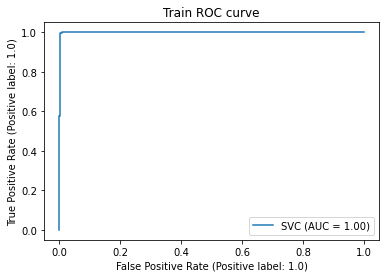

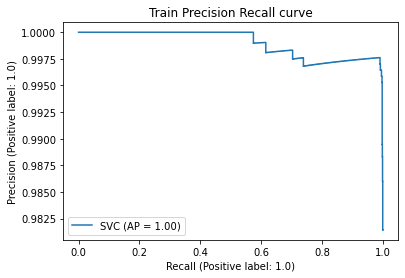

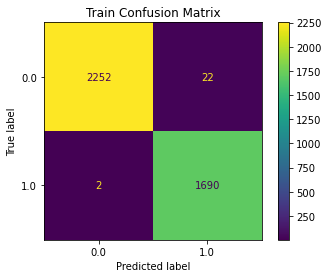

In [52]:
svc = SVC(C = 1e3)

svc.fit(X_train,y_train)

plot_classification_performance(svc, X_train,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1144
         1.0       0.96      0.99      0.97       810

    accuracy                           0.98      1954
   macro avg       0.98      0.98      0.98      1954
weighted avg       0.98      0.98      0.98      1954



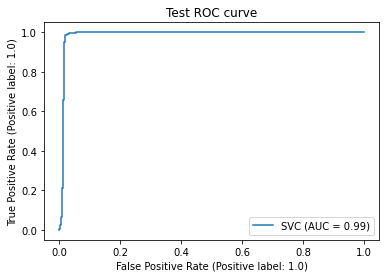

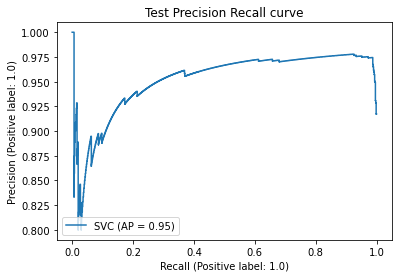

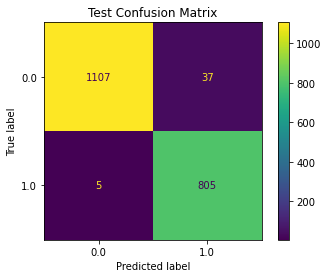

In [53]:
plot_classification_performance(svc, X_test,y_test, step ='Test', binary = True)

## 6.3 K-Nearest Neighbors with K chosen via Cross-Validation

Text(0, 0.5, 'Cross-Val Accuracy')

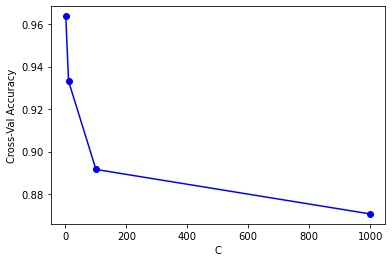

In [54]:
from sklearn.neighbors import KNeighborsClassifier


cv = 10

k_values = [1,10, 100, 1000]

cv_score = []


for k in k_values:
    


    knn  = KNeighborsClassifier(n_neighbors = k)
    
    cross_val = cross_val_score(estimator = knn, X = X_train.values, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(k_values),np.array(cv_score),'bo-')

plt.xlabel('C')
plt.ylabel('Cross-Val Accuracy')

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2274
         1.0       1.00      1.00      1.00      1692

    accuracy                           1.00      3966
   macro avg       1.00      1.00      1.00      3966
weighted avg       1.00      1.00      1.00      3966



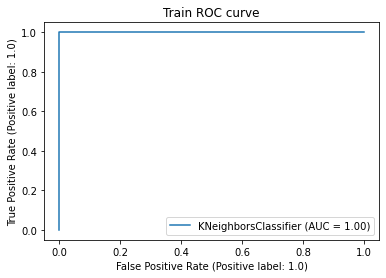

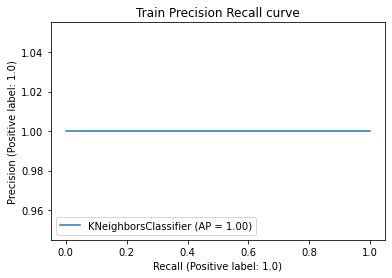

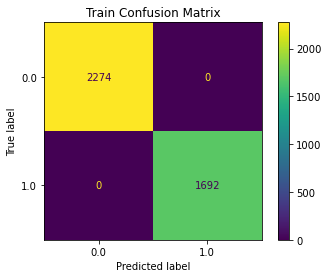

In [55]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train,y_train)

plot_classification_performance(knn, X_train,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      1144
         1.0       0.91      1.00      0.95       810

    accuracy                           0.96      1954
   macro avg       0.95      0.96      0.96      1954
weighted avg       0.96      0.96      0.96      1954



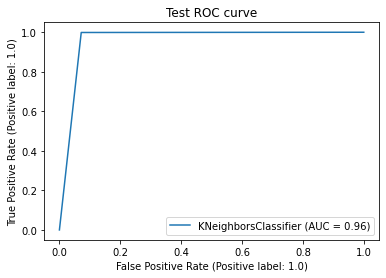

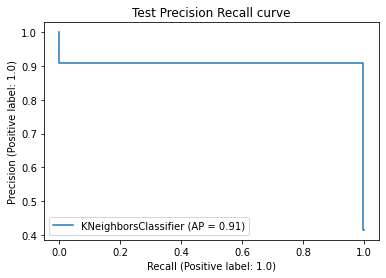

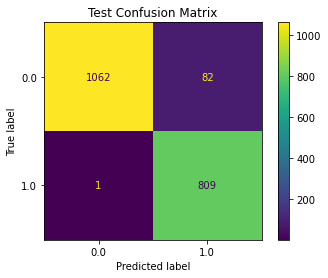

In [56]:
plot_classification_performance(knn, X_test,y_test, step ='Test', binary = True)

## 6.4 Neural Network

In [57]:
import tensorflow as tf

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer,Dense, Dropout

In [59]:
model = Sequential()

model.add(Dense(units = 10))

model.add(Dropout(0.1))

model.add(Dense(units = 5))

model.add(Dropout(0.1))

model.add(Dense(units = 2))

model.add(Dropout(0.1))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [60]:
history = model.fit(X_train,y_train, epochs = 200, validation_split = 0.1)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

112/112 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.7669 - val_loss: 0.0910 - val_accuracy: 0.8640
Epoch 2/200
112/112 [==============================] - 0s 910us/step - loss: 0.1163 - accuracy: 0.8414 - val_loss: 0.0835 - val_accuracy: 0.8715
Epoch 3/200
112/112 [==============================] - 0s 929us/step - loss: 0.1070 - accuracy: 0.8532 - val_loss: 0.0808 - val_accuracy: 0.8866
Epoch 4/200
112/112 [==============================] - 0s 898us/step - loss

112/112 [==============================] - 0s 874us/step - loss: 0.0865 - accuracy: 0.8823 - val_loss: 0.0776 - val_accuracy: 0.8917
Epoch 53/200
112/112 [==============================] - 0s 938us/step - loss: 0.0874 - accuracy: 0.8809 - val_loss: 0.0777 - val_accuracy: 0.8892
Epoch 54/200
112/112 [==============================] - 0s 899us/step - loss: 0.0879 - accuracy: 0.8826 - val_loss: 0.0780 - val_accuracy: 0.8892
Epoch 55/200
112/112 [==============================] - 0s 871us/step - loss: 0.0879 - accuracy: 0.8832 - val_loss: 0.0779 - val_accuracy: 0.8942
Epoch 56/200
112/112 [==============================] - 0s 873us/step - loss: 0.0871 - accuracy: 0.8826 - val_loss: 0.0776 - val_accuracy: 0.8892
Epoch 57/200
112/112 [==============================] - 0s 875us/step - loss: 0.0869 - accuracy: 0.8837 - val_loss: 0.0777 - val_accuracy: 0.8892
Epoch 58/200
112/112 [==============================] - 0s 863us/step - loss: 0.0867 - accuracy: 0.8851 - val_loss: 0.0773 - val_accuracy

112/112 [==============================] - 0s 890us/step - loss: 0.0884 - accuracy: 0.8820 - val_loss: 0.0776 - val_accuracy: 0.8892
Epoch 109/200
112/112 [==============================] - 0s 886us/step - loss: 0.0864 - accuracy: 0.8840 - val_loss: 0.0783 - val_accuracy: 0.8892
Epoch 110/200
112/112 [==============================] - 0s 936us/step - loss: 0.0872 - accuracy: 0.8840 - val_loss: 0.0783 - val_accuracy: 0.8892
Epoch 111/200
112/112 [==============================] - 0s 891us/step - loss: 0.0870 - accuracy: 0.8846 - val_loss: 0.0780 - val_accuracy: 0.8892
Epoch 112/200
112/112 [==============================] - 0s 880us/step - loss: 0.0866 - accuracy: 0.8851 - val_loss: 0.0780 - val_accuracy: 0.8892
Epoch 113/200
112/112 [==============================] - 0s 848us/step - loss: 0.0874 - accuracy: 0.8826 - val_loss: 0.0783 - val_accuracy: 0.8892
Epoch 114/200
112/112 [==============================] - 0s 859us/step - loss: 0.0869 - accuracy: 0.8837 - val_loss: 0.0777 - val_ac

Epoch 164/200
112/112 [==============================] - 0s 877us/step - loss: 0.0872 - accuracy: 0.8843 - val_loss: 0.0782 - val_accuracy: 0.8892
Epoch 165/200
112/112 [==============================] - 0s 870us/step - loss: 0.0857 - accuracy: 0.8862 - val_loss: 0.0782 - val_accuracy: 0.8866
Epoch 166/200
112/112 [==============================] - 0s 873us/step - loss: 0.0863 - accuracy: 0.8854 - val_loss: 0.0779 - val_accuracy: 0.8866
Epoch 167/200
112/112 [==============================] - 0s 911us/step - loss: 0.0877 - accuracy: 0.8823 - val_loss: 0.0780 - val_accuracy: 0.8892
Epoch 168/200
112/112 [==============================] - 0s 853us/step - loss: 0.0868 - accuracy: 0.8826 - val_loss: 0.0780 - val_accuracy: 0.8892
Epoch 169/200
112/112 [==============================] - 0s 895us/step - loss: 0.0862 - accuracy: 0.8832 - val_loss: 0.0781 - val_accuracy: 0.8892
Epoch 170/200
112/112 [==============================] - 0s 880us/step - loss: 0.0864 - accuracy: 0.8832 - val_loss: 0

In [61]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 492us/step - loss: 0.0901 - accuracy: 0.8751


[0.09005942940711975, 0.8751279711723328]

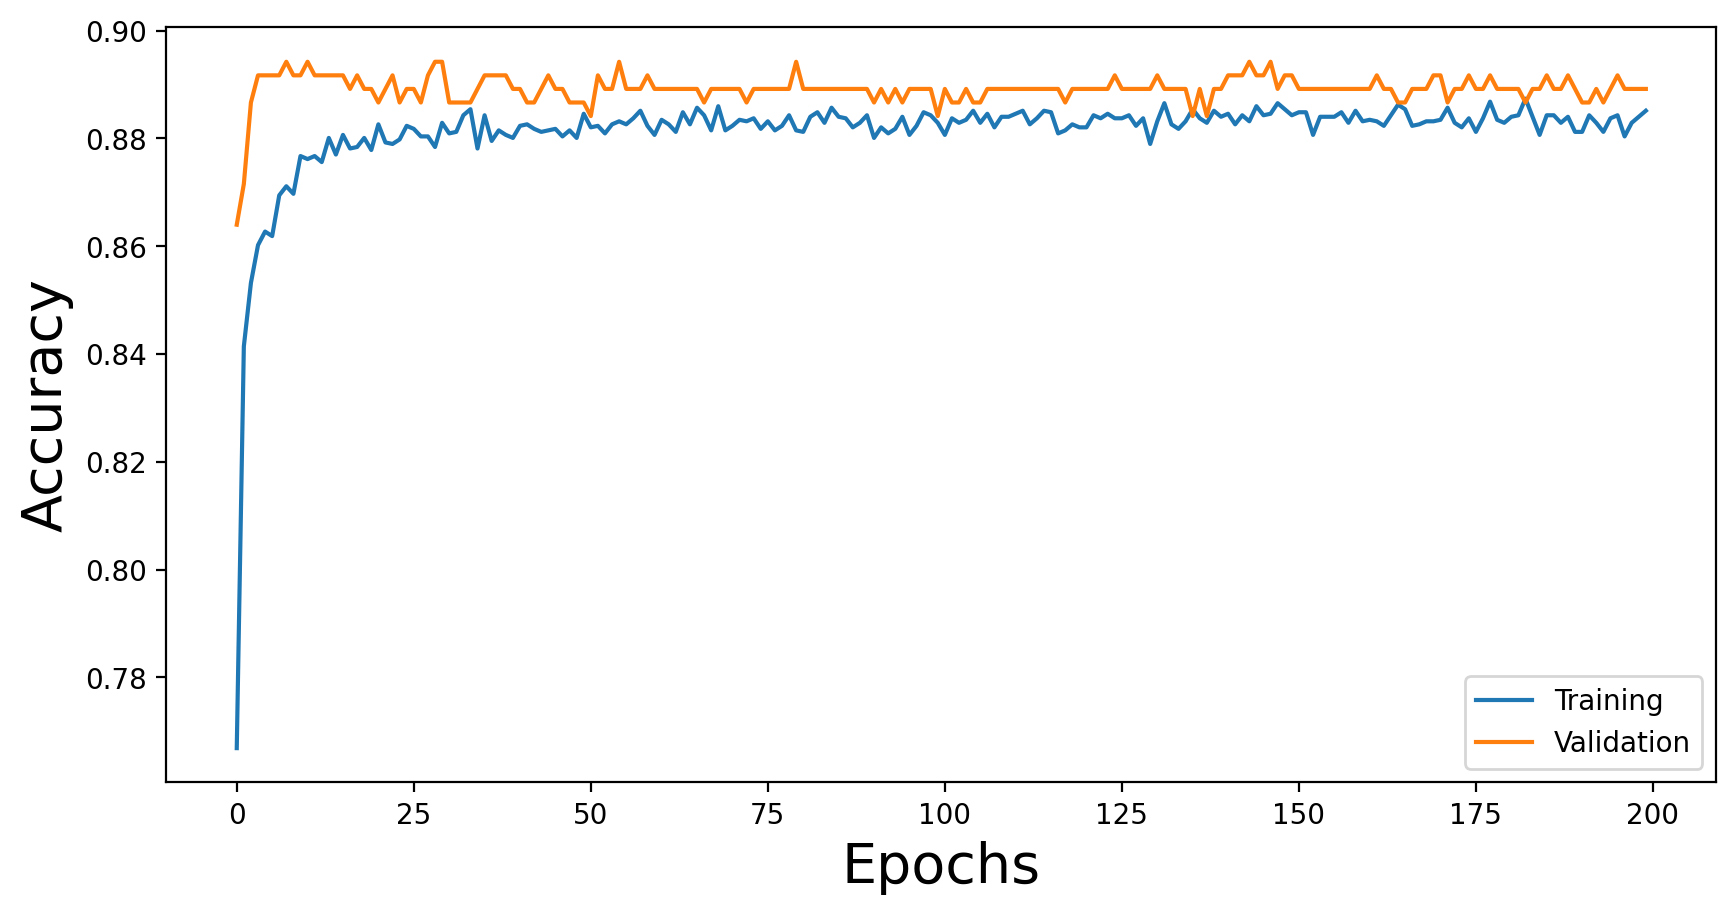

In [62]:
ig = plt.figure(figsize = (10,5), dpi = 200)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs',fontsize = 20)
plt.ylabel('Accuracy',fontsize = 20)
plt.legend(['Training','Validation'])